In [119]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from prophet import Prophet
%matplotlib inline


In [120]:
df = pd.read_excel('data_kalimantan.xlsx', sheet_name="tab") #ganti sheetname
#df = pd.read_csv('test_csv.csv', delimiter = ";")
#df = pd.read_csv("https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/passengers.csv")
#df.rename(columns={'Month': 'ds', 'Passengers': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df.head(10)

,prov,kab_name,jenis_simpanan,jenis_kpi,ds,y,kab_id
0,Kalimantar Selatan,balangan,Tabungan,Nominal,2018-12-31,504686.714593,6311.0
1,Kalimantar Selatan,balangan,Tabungan,Nominal,2019-12-31,528442.201599,6311.0
2,Kalimantar Selatan,balangan,Tabungan,Nominal,2020-12-31,593594.707898,6311.0
3,Kalimantar Selatan,balangan,Tabungan,Nominal,2021-12-31,603293.248123,6311.0
4,Kalimantar Selatan,balangan,Tabungan,Nominal,2022-12-31,649238.300245,6311.0
5,Kalimantar Selatan,balangan,Tabungan,Nominal,2023-12-31,490968.579996,6311.0
6,Kalimantar Selatan,balangan,Giro,Nominal,2018-12-31,125701.508561,6311.0
7,Kalimantar Selatan,balangan,Simpanan Berjangka,Nominal,2018-12-31,122292.867250,6311.0
8,Kalimantar Selatan,balangan,Giro,Nominal,2019-12-31,271672.391597,6311.0
9,Kalimantar Selatan,balangan,Simpanan Berjangka,Nominal,2019-12-31,149707.976999,6311.0


In [121]:
df.dtypes

prov                      object
kab_name                  object
jenis_simpanan            object
jenis_kpi                 object
ds                datetime64[ns]
y                        float64
kab_id                   float64
dtype: object

In [122]:
df_twr = df.loc[df["jenis_simpanan"] == "Tabungan"]
df_twr = df_twr.loc[df["kab_name"] == "mempawah"]
df_twr= df_twr.reset_index()
df_twr = df_twr.drop([ 
                    'index'
                    ], axis=1)
df_twr

,prov,kab_name,jenis_simpanan,jenis_kpi,ds,y,kab_id
0,Kalimantan Barat,mempawah,Tabungan,Nominal,2018-12-31,2.350124e+06,6104.0
1,Kalimantan Barat,mempawah,Tabungan,Nominal,2019-12-31,2.584118e+06,6104.0
2,Kalimantan Barat,mempawah,Tabungan,Nominal,2020-12-31,2.746821e+06,6104.0
3,Kalimantan Barat,mempawah,Tabungan,Nominal,2021-12-31,2.713592e+06,6104.0
4,Kalimantan Barat,mempawah,Tabungan,Nominal,2022-12-31,2.584160e+06,6104.0
5,Kalimantan Barat,mempawah,Tabungan,Nominal,2023-12-31,2.148623e+06,6104.0


In [123]:
m = Prophet(seasonality_mode='additive', weekly_seasonality=False)
m.add_seasonality('quarterly', period=3, fourier_order=10, mode='additive')
m.fit(df_twr)

23:50:31 - cmdstanpy - INFO - Chain [1] start processing
23:50:31 - cmdstanpy - INFO - Chain [1] done processing


In [124]:
future = m.make_future_dataframe(periods=5, freq='Y')
forecast = m.predict(future)
forecast1 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
forecast1["kab"] = "mempawah"
forecast1["jenis_simpanan"] = "tabungan"
forecast1 = forecast1[['ds', 'kab','jenis_simpanan', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast1
# forecast1.to_excel('2.xlsx',index=True)

,ds,kab,jenis_simpanan,yhat,yhat_lower,yhat_upper
0,2018-12-31,mempawah,tabungan,2.517662e+06,2.347822e+06,2.674015e+06
1,2019-12-31,mempawah,tabungan,2.417114e+06,2.248809e+06,2.579733e+06
2,2020-12-31,mempawah,tabungan,2.746616e+06,2.552654e+06,2.918309e+06
3,2021-12-31,mempawah,tabungan,2.714188e+06,2.543565e+06,2.897891e+06
4,2022-12-31,mempawah,tabungan,2.416745e+06,2.245722e+06,2.592879e+06
5,2023-12-31,mempawah,tabungan,2.316197e+06,2.139310e+06,2.487105e+06
6,2024-12-31,mempawah,tabungan,2.645699e+06,2.484670e+06,2.804740e+06
7,2025-12-31,mempawah,tabungan,2.613271e+06,2.444430e+06,2.789026e+06
8,2026-12-31,mempawah,tabungan,2.315828e+06,2.141813e+06,2.490709e+06
9,2027-12-31,mempawah,tabungan,2.215280e+06,2.045708e+06,2.400685e+06


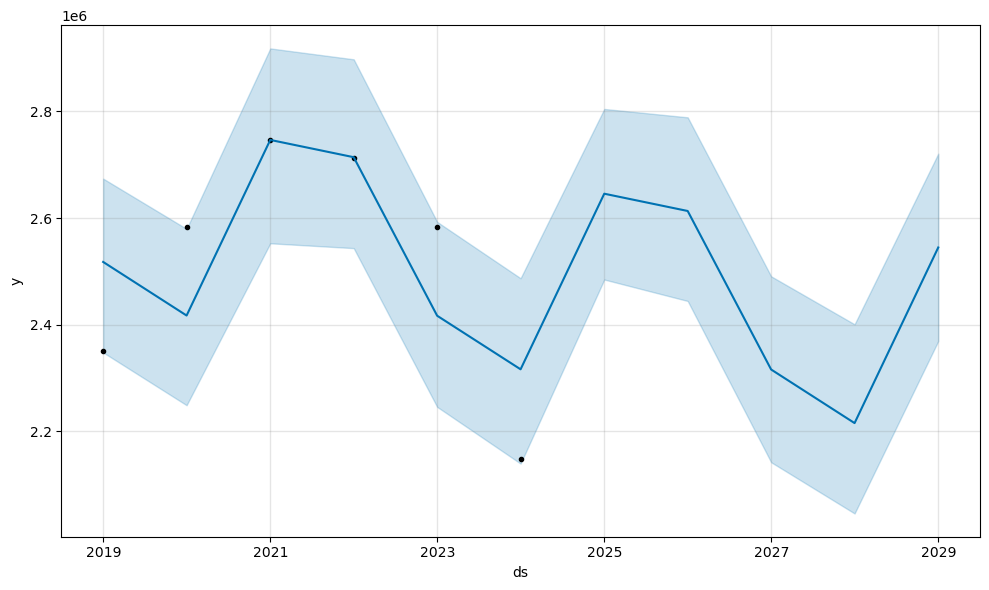

In [125]:
fig1 = m.plot(forecast)
# plt.scatter(x=df['ds'], y=df['y'], s=10, color='red')
plt.show()

In [128]:
#Let's start to loop
import time
start_time = time.time()

df_twr = df.loc[df["jenis_simpanan"] == "Tabungan"]
df_twr = df_twr.loc[df["kab_name"] == "mempawah"]
df_twr= df_twr.reset_index()
df_twr = df_twr.drop([ 
                    'index'
                    ], axis=1)
m = Prophet(seasonality_mode='additive', weekly_seasonality=False)
m.add_seasonality('quarterly', period=3, fourier_order=10, mode='additive')
m.fit(df_twr)

future = m.make_future_dataframe(periods=5, freq='Y')

forecast = m.predict(future)
forecast1 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
forecast1["kab_name"] = "mempawah"
forecast1["jenis_simpanan"] = "tabungan"
df_result = forecast1[['ds', 'kab_name','jenis_simpanan', 'yhat', 'yhat_lower', 'yhat_upper']]

print("--- %s seconds ---" % (time.time() - start_time))

df_tmp = df.loc[df["jenis_simpanan"] == "Tabungan"].copy()
df_new = df_tmp[~df_tmp.kab_name.isin(['mempawah'])].copy()
i = 1
for x in df_new['kab_name'].unique():
    df_twr = df.loc[df['kab_name'] == x]
    df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
    df_twr= df_twr.reset_index()
    df_twr = df_twr.drop([ 
                    'index'
                             ], axis=1)
    m = Prophet(seasonality_mode='additive')
    
    m.add_seasonality('quarterly', period=3, fourier_order=10, mode='additive')
    m.fit(df_twr)
    
    #predict 9 months beyond
    future = m.make_future_dataframe(periods=5, freq='Y')
    
    forecast = m.predict(future)
    forecast1 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
    forecast1["kab_name"] = x
    forecast1["jenis_simpanan"] = "tabungan"

    forecast1 = forecast1[['ds', 'kab_name','jenis_simpanan', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    #append the dataframe
    df_result = df_result.append(forecast1, ignore_index=True)
    
    #save as checkpoint
    df_result.to_csv('result_tabungan_kalimantan.csv',index=False)
    print(x,i)
    print("--- %s seconds ---" % (time.time() - start_time))
    i=i+1

23:53:06 - cmdstanpy - INFO - Chain [1] start processing
23:53:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:53:06 - cmdstanpy - INFO - Chain [1] start processing
23:53:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:53:06 - cmdstanpy - INFO - Chain [1] start processing


--- 0.09196901321411133 seconds ---
balangan 1
--- 0.15920782089233398 seconds ---


23:53:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:53:11 - cmdstanpy - INFO - Chain [1] start processing
23:53:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079

banjar 2
--- 5.732316732406616 seconds ---
barito kuala 3
--- 5.805946111679077 seconds ---
barito selatan 4
--- 5.877834796905518 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:53:12 - cmdstanpy - INFO - Chain [1] start processing
23:53:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will 

barito timur 5
--- 5.94824481010437 seconds ---
barito utara 6
--- 6.029329776763916 seconds ---
bengkayang 7
--- 6.1088707447052 seconds ---


23:53:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:53:18 - cmdstanpy - INFO - Chain [1] start processing


berau 8
--- 12.394836902618408 seconds ---


23:53:22 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:53:22 - cmdstanpy - INFO - Chain [1] start processing
23:53:22 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079

bulungan 9
--- 16.664900064468384 seconds ---
gunung mas 10
--- 16.75044298171997 seconds ---
hulu sungai selatan 11
--- 16.82981586456299 seconds ---


23:53:29 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:53:29 - cmdstanpy - INFO - Chain [1] start processing
23:53:29 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079

hulu sungai tengah 12
--- 23.095542907714844 seconds ---
hulu sungai utara 13
--- 23.16731595993042 seconds ---


23:53:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:53:35 - cmdstanpy - INFO - Chain [1] start processing
23:53:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079

kapuas 14
--- 29.29094696044922 seconds ---
kapuas hulu 15
--- 29.384166717529297 seconds ---
katingan 16
--- 29.453492879867554 seconds ---


23:53:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:53:35 - cmdstanpy - INFO - Chain [1] start processing
23:53:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079

kayong utara 17
--- 29.525059938430786 seconds ---
ketapang 18
--- 29.595246076583862 seconds ---


23:53:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:53:40 - cmdstanpy - INFO - Chain [1] start processing


kota balikpapan 19
--- 34.388859033584595 seconds ---


23:53:46 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:53:46 - cmdstanpy - INFO - Chain [1] start processing


kota banjarbaru 20
--- 40.64547085762024 seconds ---


23:53:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:53:53 - cmdstanpy - INFO - Chain [1] start processing


kota banjarmasin 21
--- 46.98136281967163 seconds ---


23:53:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:53:59 - cmdstanpy - INFO - Chain [1] start processing
23:53:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079

kota bontang 22
--- 53.21932792663574 seconds ---
kota palangkaraya 23
--- 53.30356812477112 seconds ---


23:54:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:54:05 - cmdstanpy - INFO - Chain [1] start processing


kota pontianak 24
--- 59.58233094215393 seconds ---


23:54:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:54:12 - cmdstanpy - INFO - Chain [1] start processing
23:54:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079

kota samarinda 25
--- 65.92490196228027 seconds ---
kota singkawang 26
--- 66.04210782051086 seconds ---
kota tarakan 27
--- 66.11952090263367 seconds ---


23:54:12 - cmdstanpy - INFO - Chain [1] start processing
23:54:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:54:12 - cmdstanpy - INFO - Chain [1] start processing
23:54:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/fo

kotabaru 28
--- 66.19736385345459 seconds ---
kotawaringin barat 29
--- 66.26353406906128 seconds ---
kotawaringin timur 30
--- 66.33922076225281 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:54:12 - cmdstanpy - INFO - Chain [1] start processing
23:54:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will 

kubu raya 31
--- 66.41744184494019 seconds ---
kutai barat 32
--- 66.49908185005188 seconds ---
kutai kartanegara 33
--- 66.56354403495789 seconds ---


23:54:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:54:12 - cmdstanpy - INFO - Chain [1] start processing
23:54:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079

kutai timur 34
--- 66.65026712417603 seconds ---
lamandau 35
--- 66.7085599899292 seconds ---
landak 36
--- 66.80087184906006 seconds ---


23:54:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:54:13 - cmdstanpy - INFO - Chain [1] start processing
23:54:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079

mahakam ulu 37
--- 66.89336895942688 seconds ---
malinau 38
--- 66.96090888977051 seconds ---


23:54:15 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:54:15 - cmdstanpy - INFO - Chain [1] start processing
23:54:15 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079

melawi 39
--- 69.6610848903656 seconds ---
murung raya 40
--- 69.71990895271301 seconds ---
nunukan 41
--- 69.79738998413086 seconds ---


23:54:22 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:54:22 - cmdstanpy - INFO - Chain [1] start processing
23:54:22 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079

paser 42
--- 76.23855686187744 seconds ---
penajam paser utara 43
--- 76.31273794174194 seconds ---
pulang pisau 44
--- 76.36405396461487 seconds ---


23:54:28 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:54:28 - cmdstanpy - INFO - Chain [1] start processing
23:54:28 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079

sambas 45
--- 82.66476583480835 seconds ---
sanggau 46
--- 82.7311646938324 seconds ---
sekadau 47
--- 82.81637978553772 seconds ---


23:54:29 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:54:29 - cmdstanpy - INFO - Chain [1] start processing
23:54:29 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079

seruyan 48
--- 82.89392304420471 seconds ---
sintang 49
--- 82.97520089149475 seconds ---
sukamara 50
--- 83.0475640296936 seconds ---


23:54:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:54:34 - cmdstanpy - INFO - Chain [1] start processing
23:54:34 - cmdstanpy - INFO - Chain [1] done processing


tabalong 51
--- 88.70479083061218 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:54:35 - cmdstanpy - INFO - Chain [1] start processing
23:54:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will 

tana tidung 52
--- 88.94147491455078 seconds ---
tanah bumbu 53
--- 89.08018398284912 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Tabungan"]
23:54:35 - cmdstanpy - INFO - Chain [1] start processing
23:54:35 - cmdstanpy - INFO - Chain [1] done processing


tanah laut 54
--- 89.14536786079407 seconds ---
tapin 55
--- 89.21330976486206 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3427304916.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)


In [129]:
df_result.to_excel('result_tabungan_kalimantan.xlsx',index=False)

In [130]:
df_result

,ds,kab_name,jenis_simpanan,yhat,yhat_lower,yhat_upper
0,2018-12-31,mempawah,tabungan,2.517662e+06,2.335253e+06,2.690540e+06
1,2019-12-31,mempawah,tabungan,2.417114e+06,2.234208e+06,2.594586e+06
2,2020-12-31,mempawah,tabungan,2.746616e+06,2.572092e+06,2.917529e+06
3,2021-12-31,mempawah,tabungan,2.714188e+06,2.550001e+06,2.878501e+06
4,2022-12-31,mempawah,tabungan,2.416745e+06,2.250901e+06,2.595090e+06
...,...,...,...,...,...,...
611,2024-12-31,tapin,tabungan,2.337775e+06,2.280883e+06,2.399162e+06
612,2025-12-31,tapin,tabungan,2.612795e+06,2.552544e+06,2.676477e+06
613,2026-12-31,tapin,tabungan,3.288420e+06,3.229183e+06,3.347729e+06
614,2027-12-31,tapin,tabungan,3.478742e+06,3.416817e+06,3.537409e+06


In [131]:
#Let's start to loop
import time
start_time = time.time()

df_twr = df.loc[df["jenis_simpanan"] == "Giro"]
df_twr = df_twr.loc[df["kab_name"] == "mempawah"]
df_twr= df_twr.reset_index()
df_twr = df_twr.drop([ 
                    'index'
                    ], axis=1)
m = Prophet(seasonality_mode='additive', weekly_seasonality=False)
m.add_seasonality('quarterly', period=3, fourier_order=10, mode='additive')
m.fit(df_twr)

future = m.make_future_dataframe(periods=5, freq='Y')

forecast = m.predict(future)
forecast1 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
forecast1["kab_name"] = "mempawah"
forecast1["jenis_simpanan"] = "giro"
df_result = forecast1[['ds', 'kab_name','jenis_simpanan', 'yhat', 'yhat_lower', 'yhat_upper']]

print("--- %s seconds ---" % (time.time() - start_time))

df_tmp = df.loc[df["jenis_simpanan"] == "Giro"].copy()
df_new = df_tmp[~df_tmp.kab_name.isin(['mempawah'])].copy()
i = 1
for x in df_new['kab_name'].unique():
    df_twr = df.loc[df['kab_name'] == x]
    df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
    df_twr= df_twr.reset_index()
    df_twr = df_twr.drop([ 
                    'index'
                             ], axis=1)
    m = Prophet(seasonality_mode='additive')
    
    m.add_seasonality('quarterly', period=3, fourier_order=10, mode='additive')
    m.fit(df_twr)
    
    #predict 9 months beyond
    future = m.make_future_dataframe(periods=5, freq='Y')
    
    forecast = m.predict(future)
    forecast1 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
    forecast1["kab_name"] = x
    forecast1["jenis_simpanan"] = "giro"

    forecast1 = forecast1[['ds', 'kab_name','jenis_simpanan', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    #append the dataframe
    df_result = df_result.append(forecast1, ignore_index=True)
    
    #save as checkpoint
    df_result.to_csv('result_giro_kalimantan.csv',index=False)
    print(x,i)
    print("--- %s seconds ---" % (time.time() - start_time))
    i=i+1

23:54:35 - cmdstanpy - INFO - Chain [1] start processing
23:54:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]


--- 0.06314682960510254 seconds ---


23:54:35 - cmdstanpy - INFO - Chain [1] start processing
23:54:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:54:35 - cmdstanpy - INFO - Chain [1] start processing


balangan 1
--- 0.13507580757141113 seconds ---


23:54:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:54:40 - cmdstanpy - INFO - Chain [1] start processing
23:54:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/363

banjar 2
--- 4.547234773635864 seconds ---
barito kuala 3
--- 4.607174873352051 seconds ---
barito selatan 4
--- 4.677403926849365 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:54:40 - cmdstanpy - INFO - Chain [1] start processing
23:54:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be r

barito timur 5
--- 4.751088857650757 seconds ---
barito utara 6
--- 4.8197548389434814 seconds ---
bengkayang 7
--- 4.906753778457642 seconds ---


23:54:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:54:40 - cmdstanpy - INFO - Chain [1] start processing
23:54:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/363

berau 8
--- 4.9857118129730225 seconds ---
bulungan 9
--- 5.0562567710876465 seconds ---


23:54:46 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:54:46 - cmdstanpy - INFO - Chain [1] start processing


donggala 10
--- 11.34629487991333 seconds ---


23:54:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:54:53 - cmdstanpy - INFO - Chain [1] start processing
23:54:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/363

gunung mas 11
--- 17.601778984069824 seconds ---
hulu sungai selatan 12
--- 17.693463802337646 seconds ---
hulu sungai tengah 13
--- 17.754921913146973 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:54:53 - cmdstanpy - INFO - Chain [1] start processing
23:54:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be r

hulu sungai utara 14
--- 17.8222918510437 seconds ---
kapuas 15
--- 17.881945848464966 seconds ---
kapuas hulu 16
--- 17.947696924209595 seconds ---
katingan 17
--- 18.01817297935486 seconds ---


23:54:53 - cmdstanpy - INFO - Chain [1] start processing
23:54:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:54:53 - cmdstanpy - INFO - Chain [1] start processing
23:54:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folder

kayong utara 18
--- 18.10313606262207 seconds ---
ketapang 19
--- 18.168742895126343 seconds ---
kota balikpapan 20
--- 18.234410762786865 seconds ---
kota banjarbaru 21
--- 18.30497169494629 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:54:53 - cmdstanpy - INFO - Chain [1] start processing
23:55:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:55:00 - cmdstanpy - INFO - Chain [1] start processing
23:55:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:

kota banjarmasin 22
--- 24.622373819351196 seconds ---
kota bontang 23
--- 24.686683893203735 seconds ---
kota palangkaraya 24
--- 24.75227689743042 seconds ---


23:55:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:55:06 - cmdstanpy - INFO - Chain [1] start processing
23:55:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/363

kota pontianak 25
--- 31.079598903656006 seconds ---
kota samarinda 26
--- 31.15212392807007 seconds ---
kota singkawang 27
--- 31.22374987602234 seconds ---


23:55:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:55:06 - cmdstanpy - INFO - Chain [1] start processing
23:55:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/363

kota tarakan 28
--- 31.347573041915894 seconds ---
kotabaru 29
--- 31.416789054870605 seconds ---
kotawaringin barat 30
--- 31.480475902557373 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:55:07 - cmdstanpy - INFO - Chain [1] start processing
23:55:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be r

kotawaringin timur 31
--- 31.557101726531982 seconds ---
kubu raya 32
--- 31.627952814102173 seconds ---
kutai barat 33
--- 31.69483780860901 seconds ---
kutai kartanegara 34
--- 31.75149893760681 seconds ---


23:55:07 - cmdstanpy - INFO - Chain [1] start processing
23:55:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:55:07 - cmdstanpy - INFO - Chain [1] start processing
23:55:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folder

kutai timur 35
--- 31.81407070159912 seconds ---
lamandau 36
--- 31.88405680656433 seconds ---
landak 37
--- 31.964993715286255 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:55:07 - cmdstanpy - INFO - Chain [1] start processing
23:55:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be r

mahakam ulu 38
--- 32.02558898925781 seconds ---
malinau 39
--- 32.09889793395996 seconds ---
melawi 40
--- 32.159026861190796 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:55:07 - cmdstanpy - INFO - Chain [1] start processing
23:55:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:55:07 - cmdstanpy - INFO - Chain [1] start processing
23:55:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:

murung raya 41
--- 32.229113817214966 seconds ---
nunukan 42
--- 32.332188844680786 seconds ---
paser 43
--- 32.399412870407104 seconds ---


23:55:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:55:07 - cmdstanpy - INFO - Chain [1] start processing
23:55:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/363

penajam paser utara 44
--- 32.45737290382385 seconds ---
pulang pisau 45
--- 32.52218294143677 seconds ---
sambas 46
--- 32.588680028915405 seconds ---


23:55:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:55:13 - cmdstanpy - INFO - Chain [1] start processing
23:55:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/363

sanggau 47
--- 38.3692307472229 seconds ---
sekadau 48
--- 38.44601392745972 seconds ---
seruyan 49
--- 38.512470722198486 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:55:14 - cmdstanpy - INFO - Chain [1] start processing
23:55:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be r

sintang 50
--- 38.58279585838318 seconds ---
sukamara 51
--- 38.65489888191223 seconds ---
tabalong 52
--- 38.714956760406494 seconds ---
tana tidung 53
--- 38.78097486495972 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:55:14 - cmdstanpy - INFO - Chain [1] start processing
23:55:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Giro"]
23:55:16 - cmdstanpy - INFO - Chain [1] start processing
23:55:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:

tanah bumbu 54
--- 40.814074754714966 seconds ---
tanah laut 55
--- 40.88203287124634 seconds ---
tapin 56
--- 40.93581175804138 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/3636020173.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)


In [132]:
df_result.to_excel('result_giro_kalimantan.xlsx',index=False)

In [133]:
#Let's start to loop
import time
start_time = time.time()

df_twr = df.loc[df["jenis_simpanan"] == "Simpanan Berjangka"]
df_twr = df_twr.loc[df["kab_name"] == "mempawah"]
df_twr= df_twr.reset_index()
df_twr = df_twr.drop([ 
                    'index'
                    ], axis=1)
m = Prophet(seasonality_mode='additive', weekly_seasonality=False)
m.add_seasonality('quarterly', period=3, fourier_order=10, mode='additive')
m.fit(df_twr)

future = m.make_future_dataframe(periods=5, freq='Y')

forecast = m.predict(future)
forecast1 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
forecast1["kab_name"] = "mempawah"
forecast1["jenis_simpanan"] = "Simpanan Berjangka"
df_result = forecast1[['ds', 'kab_name','jenis_simpanan', 'yhat', 'yhat_lower', 'yhat_upper']]

print("--- %s seconds ---" % (time.time() - start_time))

df_tmp = df.loc[df["jenis_simpanan"] == "Simpanan Berjangka"].copy()
df_new = df_tmp[~df_tmp.kab_name.isin(['mempawah'])].copy()
i = 1
for x in df_new['kab_name'].unique():
    df_twr = df.loc[df['kab_name'] == x]
    df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
    df_twr= df_twr.reset_index()
    df_twr = df_twr.drop([ 
                    'index'
                             ], axis=1)
    m = Prophet(seasonality_mode='additive')
    
    m.add_seasonality('quarterly', period=3, fourier_order=10, mode='additive')
    m.fit(df_twr)
    
    #predict 9 months beyond
    future = m.make_future_dataframe(periods=5, freq='Y')
    
    forecast = m.predict(future)
    forecast1 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
    forecast1["kab_name"] = x
    forecast1["jenis_simpanan"] = "Simpanan Berjangka"

    forecast1 = forecast1[['ds', 'kab_name','jenis_simpanan', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    #append the dataframe
    df_result = df_result.append(forecast1, ignore_index=True)
    
    #save as checkpoint
    df_result.to_csv('result_Simpanan_Berjangka_kalimantan.csv',index=False)
    print(x,i)
    print("--- %s seconds ---" % (time.time() - start_time))
    i=i+1

23:55:16 - cmdstanpy - INFO - Chain [1] start processing
23:55:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:16 - cmdstanpy - INFO - Chain [1] start processing
23:55:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:16 - cmdstanpy - INFO - Chain [1] start proce

--- 0.07743310928344727 seconds ---
balangan 1
--- 0.13785910606384277 seconds ---
banjar 2
--- 0.20930719375610352 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:16 - cmdstanpy - INFO - Chain [1] start processing
23:55:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series

barito kuala 3
--- 0.29190921783447266 seconds ---
barito selatan 4
--- 0.36550402641296387 seconds ---
barito timur 5
--- 0.427626371383667 seconds ---


23:55:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:20 - cmdstanpy - INFO - Chain [1] start processing
23:55:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipyke

barito utara 6
--- 3.6686320304870605 seconds ---
bengkayang 7
--- 3.8238730430603027 seconds ---


23:55:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:20 - cmdstanpy - INFO - Chain [1] start processing
23:55:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipyke

berau 8
--- 3.908963203430176 seconds ---
bulungan 9
--- 3.9697771072387695 seconds ---


23:55:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:26 - cmdstanpy - INFO - Chain [1] start processing
23:55:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipyke

gunung mas 10
--- 10.22265911102295 seconds ---
hulu sungai selatan 11
--- 10.297538042068481 seconds ---
hulu sungai tengah 12
--- 10.3721342086792 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:26 - cmdstanpy - INFO - Chain [1] start processing
23:55:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series

hulu sungai utara 13
--- 10.435110092163086 seconds ---
kapuas 14
--- 10.507086038589478 seconds ---
kapuas hulu 15
--- 10.57036018371582 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:27 - cmdstanpy - INFO - Chain [1] start processing


katingan 16
--- 10.64542007446289 seconds ---


23:55:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:32 - cmdstanpy - INFO - Chain [1] start processing
23:55:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipyke

kayong utara 17
--- 15.696962118148804 seconds ---
ketapang 18
--- 15.758929252624512 seconds ---


23:55:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:38 - cmdstanpy - INFO - Chain [1] start processing
23:55:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipyke

kota balikpapan 19
--- 22.047434329986572 seconds ---
kota banjarbaru 20
--- 22.124385118484497 seconds ---
kota banjarmasin 21
--- 22.203636169433594 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:38 - cmdstanpy - INFO - Chain [1] start processing
23:55:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series

kota bontang 22
--- 22.26957631111145 seconds ---
kota palangkaraya 23
--- 22.341374158859253 seconds ---


23:55:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:44 - cmdstanpy - INFO - Chain [1] start processing
23:55:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipyke

kota pontianak 24
--- 27.883010149002075 seconds ---
kota samarinda 25
--- 27.950265169143677 seconds ---
kota singkawang 26
--- 28.024434328079224 seconds ---


23:55:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:44 - cmdstanpy - INFO - Chain [1] start processing
23:55:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipyke

kota tarakan 27
--- 28.122986316680908 seconds ---
kotabaru 28
--- 28.19326615333557 seconds ---
kotawaringin barat 29
--- 28.258548259735107 seconds ---


23:55:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:51 - cmdstanpy - INFO - Chain [1] start processing


kotawaringin timur 30
--- 34.662020206451416 seconds ---


23:55:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:55:57 - cmdstanpy - INFO - Chain [1] start processing


kubu raya 31
--- 40.733872175216675 seconds ---


23:56:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:56:03 - cmdstanpy - INFO - Chain [1] start processing
23:56:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipyke

kutai barat 32
--- 47.191856145858765 seconds ---
kutai kartanegara 33
--- 47.257184982299805 seconds ---
kutai timur 34
--- 47.337629318237305 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:56:03 - cmdstanpy - INFO - Chain [1] start processing


lamandau 35
--- 47.40128517150879 seconds ---


23:56:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:56:10 - cmdstanpy - INFO - Chain [1] start processing
23:56:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipyke

landak 36
--- 53.74208927154541 seconds ---
mahakam ulu 37
--- 53.82779812812805 seconds ---
malinau 38
--- 53.92204999923706 seconds ---


23:56:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:56:16 - cmdstanpy - INFO - Chain [1] start processing


melawi 39
--- 60.24063730239868 seconds ---


23:56:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:56:23 - cmdstanpy - INFO - Chain [1] start processing
23:56:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipyke

murung raya 40
--- 66.77887201309204 seconds ---
nunukan 41
--- 66.8618700504303 seconds ---


23:56:29 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:56:29 - cmdstanpy - INFO - Chain [1] start processing


paser 42
--- 73.19888925552368 seconds ---


23:56:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:56:35 - cmdstanpy - INFO - Chain [1] start processing
23:56:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipyke

penajam paser utara 43
--- 79.55044722557068 seconds ---
pulang pisau 44
--- 79.63483810424805 seconds ---
sambas 45
--- 79.72334718704224 seconds ---


23:56:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:56:36 - cmdstanpy - INFO - Chain [1] start processing
23:56:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipyke

sanggau 46
--- 79.79679107666016 seconds ---
sekadau 47
--- 79.86626410484314 seconds ---
seruyan 48
--- 79.92643928527832 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:56:36 - cmdstanpy - INFO - Chain [1] start processing
23:56:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series

sintang 49
--- 80.0096082687378 seconds ---
sukamara 50
--- 80.07875227928162 seconds ---
tabalong 51
--- 80.14554619789124 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_simpanan"] == "Simpanan Berjangka"]
23:56:36 - cmdstanpy - INFO - Chain [1] start processing
23:56:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:30: UserWarning: Boolean Series

tana tidung 52
--- 80.22065114974976 seconds ---
tanah bumbu 53
--- 80.28928208351135 seconds ---
tanah laut 54
--- 80.3562879562378 seconds ---
tapin 55
--- 80.42752814292908 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/1903027609.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)


In [134]:
df_result.to_excel('result_simpanan_berjangka_kalimantan.xlsx',index=False)

In [135]:
df = pd.read_excel('data_kalimantan.xlsx', sheet_name="pinjaman") #ganti sheetname
#df = pd.read_csv('test_csv.csv', delimiter = ";")
#df = pd.read_csv("https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/passengers.csv")
#df.rename(columns={'Month': 'ds', 'Passengers': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df.head(10)

,prov,kab_name,jenis_sektor_ekonomi,jenis_kpi,ds,y,kab_id
0,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,"Pertanian, Kehutanan & Perikanan",2017-12-31,66515.806015,6104
1,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,Pertambangan dan Penggalian,2017-12-31,179645.250845,6104
2,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,Industri Pengolahan,2017-12-31,392354.573425,6104
3,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,Pengadaan Listrik Dan Gas,2017-12-31,961.866335,6104
4,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,"Pengadaan Air, Pengelolaan Sampah, Limbah Dan ...",2017-12-31,1654.539564,6104
5,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,Konstruksi,2017-12-31,70136.769269,6104
6,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,"Perdagangan Besar Dan Eceran, Reparasi Mobil D...",2017-12-31,800247.884882,6104
7,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,Transportasi Dan Pergudangan,2017-12-31,520962.301867,6104
8,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,Penyediaan Akomodasi Dan Makan Minum,2017-12-31,51066.171176,6104
9,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,Informasi Dan Komunikasi,2017-12-31,515.323286,6104


In [136]:
df_twr = df.loc[df["jenis_kpi"] == "Pertanian, Kehutanan & Perikanan"]
df_twr = df_twr.loc[df["kab_name"] == "mempawah"]
df_twr= df_twr.reset_index()
df_twr = df_twr.drop([ 
                    'index'
                    ], axis=1)
df_twr

,prov,kab_name,jenis_sektor_ekonomi,jenis_kpi,ds,y,kab_id
0,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,"Pertanian, Kehutanan & Perikanan",2017-12-31,66515.806015,6104
1,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,"Pertanian, Kehutanan & Perikanan",2018-12-31,74795.623318,6104
2,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,"Pertanian, Kehutanan & Perikanan",2019-12-31,80024.448308,6104
3,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,"Pertanian, Kehutanan & Perikanan",2020-12-31,100290.951567,6104
4,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,"Pertanian, Kehutanan & Perikanan",2021-12-31,121670.285124,6104
5,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,"Pertanian, Kehutanan & Perikanan",2022-12-31,112952.427095,6104
6,Kalimantan Barat,mempawah,Pinjaman Berdasarkan Lapangan Usaha,"Pertanian, Kehutanan & Perikanan",2023-12-31,133001.334080,6104


In [137]:
m = Prophet(seasonality_mode='additive', weekly_seasonality=False)
m.add_seasonality('quarterly', period=3, fourier_order=10, mode='additive')
m.fit(df_twr)

00:08:04 - cmdstanpy - INFO - Chain [1] start processing
00:08:04 - cmdstanpy - INFO - Chain [1] done processing


In [138]:
future = m.make_future_dataframe(periods=5, freq='Y')
forecast = m.predict(future)
forecast1 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
forecast1["kab"] = "mempawah"
forecast1["jenis_kpi"] = "Pertanian, Kehutanan & Perikanan"
forecast1 = forecast1[['ds', 'kab','jenis_kpi', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast1
# forecast1.to_excel('2.xlsx',index=True)

,ds,kab,jenis_kpi,yhat,yhat_lower,yhat_upper
0,2017-12-31,mempawah,"Pertanian, Kehutanan & Perikanan",69712.304037,65198.282896,74113.018701
1,2018-12-31,mempawah,"Pertanian, Kehutanan & Perikanan",69494.122935,64977.951044,74068.583517
2,2019-12-31,mempawah,"Pertanian, Kehutanan & Perikanan",82132.826864,77936.312592,86690.935231
3,2020-12-31,mempawah,"Pertanian, Kehutanan & Perikanan",100291.037675,95753.517159,104603.356492
4,2021-12-31,mempawah,"Pertanian, Kehutanan & Perikanan",118473.018833,114343.869892,122857.189974
5,2022-12-31,mempawah,"Pertanian, Kehutanan & Perikanan",118254.833250,113858.811666,122748.922834
6,2023-12-31,mempawah,"Pertanian, Kehutanan & Perikanan",130893.534911,126372.840444,135519.929279
7,2024-12-31,mempawah,"Pertanian, Kehutanan & Perikanan",149051.744638,144489.697189,153820.257224
8,2025-12-31,mempawah,"Pertanian, Kehutanan & Perikanan",167233.725513,162688.066088,171568.398588
9,2026-12-31,mempawah,"Pertanian, Kehutanan & Perikanan",167015.539930,162609.253561,171245.999544


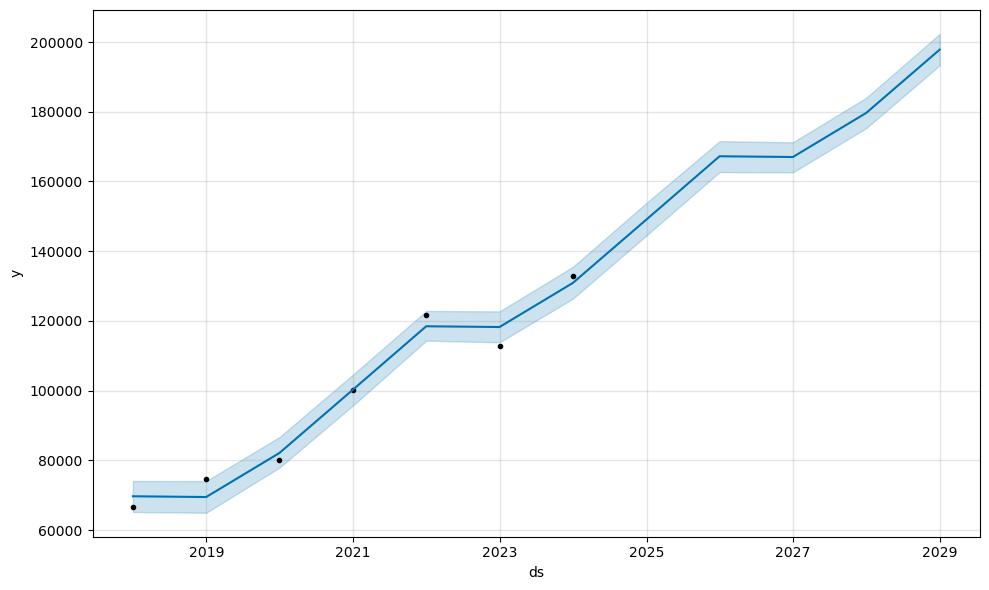

In [139]:
fig1 = m.plot(forecast)
# plt.scatter(x=df['ds'], y=df['y'], s=10, color='red')
plt.show()

In [143]:
#Let's start to loop
import time

for yy in df['jenis_kpi'].unique():
    start_time = time.time()

    df_twr = df.loc[df["jenis_kpi"] == yy]
    df_twr = df_twr.loc[df["kab_name"] == "mempawah"]
    df_twr= df_twr.reset_index()
    df_twr = df_twr.drop([ 
                        'index'
                        ], axis=1)
    m = Prophet(seasonality_mode='additive', weekly_seasonality=False)
    m.add_seasonality('quarterly', period=3, fourier_order=10, mode='additive')
    m.fit(df_twr)

    future = m.make_future_dataframe(periods=5, freq='Y')

    forecast = m.predict(future)
    forecast1 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
    forecast1["kab_name"] = "mempawah"
    forecast1["jenis_kpi"] = yy
    df_result = forecast1[['ds', 'kab_name','jenis_kpi', 'yhat', 'yhat_lower', 'yhat_upper']]

    print("--- %s seconds ---" % (time.time() - start_time))

    df_tmp = df.loc[df["jenis_kpi"] == yy].copy()
    df_new = df_tmp[~df_tmp.kab_name.isin(['mempawah'])].copy()
    i = 1
    for x in df_new['kab_name'].unique():
        df_twr = df.loc[df['kab_name'] == x]
        df_twr = df_twr[df["jenis_kpi"] == yy]
        df_twr= df_twr.reset_index()
        df_twr = df_twr.drop([ 
                        'index'
                                 ], axis=1)
        m = Prophet(seasonality_mode='additive')

        m.add_seasonality('quarterly', period=3, fourier_order=10, mode='additive')
        m.fit(df_twr)

        #predict 9 months beyond
        future = m.make_future_dataframe(periods=5, freq='Y')

        forecast = m.predict(future)
        forecast1 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
        forecast1["kab_name"] = x
        forecast1["jenis_kpi"] = yy

        forecast1 = forecast1[['ds', 'kab_name','jenis_kpi', 'yhat', 'yhat_lower', 'yhat_upper']]

        #append the dataframe
        df_result = df_result.append(forecast1, ignore_index=True)

        #save as checkpoint
        df_result.to_excel('result_'+yy+'_kalimantan.xlsx',index=False)
        print(yy,x,i)
        print("--- %s seconds ---" % (time.time() - start_time))
        i=i+1

00:30:49 - cmdstanpy - INFO - Chain [1] start processing
00:30:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:49 - cmdstanpy - INFO - Chain [1] start processing
00:30:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:49 - cmdstanpy - INFO - Chain [1] start processing
00:30:49 - cmdstanpy - INFO - Chain [1] 

--- 0.12335896492004395 seconds ---
Pertanian, Kehutanan & Perikanan sambas 1
--- 0.19965910911560059 seconds ---
Pertanian, Kehutanan & Perikanan ketapang 2
--- 0.2775428295135498 seconds ---


00:30:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:49 - cmdstanpy - INFO - Chain [1] start processing
00:30:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertanian, Kehutanan & Perikanan sanggau 3
--- 0.3586292266845703 seconds ---
Pertanian, Kehutanan & Perikanan sintang 4
--- 0.4454340934753418 seconds ---
Pertanian, Kehutanan & Perikanan kapuas hulu 5
--- 0.543931245803833 seconds ---


00:30:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:49 - cmdstanpy - INFO - Chain [1] start processing
00:30:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertanian, Kehutanan & Perikanan bengkayang 6
--- 0.6282448768615723 seconds ---
Pertanian, Kehutanan & Perikanan landak 7
--- 0.7084610462188721 seconds ---
Pertanian, Kehutanan & Perikanan sekadau 8
--- 0.8032660484313965 seconds ---


00:30:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:49 - cmdstanpy - INFO - Chain [1] start processing
00:30:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertanian, Kehutanan & Perikanan melawi 9
--- 0.8850460052490234 seconds ---
Pertanian, Kehutanan & Perikanan kayong utara 10
--- 0.9718499183654785 seconds ---
Pertanian, Kehutanan & Perikanan kubu raya 11
--- 1.0818228721618652 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:50 - cmdstanpy - INFO - Chain [1] start processing
00:30:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:50 - cmdstanpy - INFO - Chain [1] start processing


Pertanian, Kehutanan & Perikanan kota pontianak 12
--- 1.1639149188995361 seconds ---


00:30:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:56 - cmdstanpy - INFO - Chain [1] start processing
00:30:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertanian, Kehutanan & Perikanan kota singkawang 13
--- 7.836652040481567 seconds ---
Pertanian, Kehutanan & Perikanan bulungan 14
--- 7.9283530712127686 seconds ---
Pertanian, Kehutanan & Perikanan nunukan 15
--- 8.019777059555054 seconds ---


00:30:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:57 - cmdstanpy - INFO - Chain [1] start processing
00:30:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertanian, Kehutanan & Perikanan malinau 16
--- 8.11706018447876 seconds ---
Pertanian, Kehutanan & Perikanan tana tidung 17
--- 8.21156907081604 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:57 - cmdstanpy - INFO - Chain [1] start processing
00:30:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertanian, Kehutanan & Perikanan kota tarakan 18
--- 8.34871506690979 seconds ---
Pertanian, Kehutanan & Perikanan kapuas 19
--- 8.446310997009277 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:57 - cmdstanpy - INFO - Chain [1] start processing
00:30:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:57 - cmdstanpy - INFO - Chain [1] start processing
00:30:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pertanian, Kehutanan & Perikanan kotawaringin barat 20
--- 8.55046820640564 seconds ---
Pertanian, Kehutanan & Perikanan kotawaringin timur 21
--- 8.631875038146973 seconds ---
Pertanian, Kehutanan & Perikanan murung raya 22
--- 8.71832799911499 seconds ---


00:30:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:57 - cmdstanpy - INFO - Chain [1] start processing
00:30:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertanian, Kehutanan & Perikanan barito timur 23
--- 8.833070993423462 seconds ---
Pertanian, Kehutanan & Perikanan barito selatan 24
--- 9.00051498413086 seconds ---


00:30:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:58 - cmdstanpy - INFO - Chain [1] start processing
00:30:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertanian, Kehutanan & Perikanan gunung mas 25
--- 9.09454894065857 seconds ---
Pertanian, Kehutanan & Perikanan barito utara 26
--- 9.189610004425049 seconds ---
Pertanian, Kehutanan & Perikanan pulang pisau 27
--- 9.292351961135864 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:58 - cmdstanpy - INFO - Chain [1] start processing
00:30:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:58 - cmdstanpy - INFO - Chain [1] start processing
00:30:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pertanian, Kehutanan & Perikanan seruyan 28
--- 9.416779041290283 seconds ---
Pertanian, Kehutanan & Perikanan katingan 29
--- 9.515185832977295 seconds ---
Pertanian, Kehutanan & Perikanan sukamara 30
--- 9.616214036941528 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:58 - cmdstanpy - INFO - Chain [1] start processing
00:30:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:58 - cmdstanpy - INFO - Chain [1] start processing
00:30:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pertanian, Kehutanan & Perikanan lamandau 31
--- 9.783880949020386 seconds ---
Pertanian, Kehutanan & Perikanan kota palangkaraya 32
--- 9.979926109313965 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:30:59 - cmdstanpy - INFO - Chain [1] start processing
00:31:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:05 - cmdstanpy - INFO - Chain [1] start processing
00:31:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pertanian, Kehutanan & Perikanan kutai kartanegara 33
--- 16.88548994064331 seconds ---
Pertanian, Kehutanan & Perikanan berau 34
--- 16.995357036590576 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:06 - cmdstanpy - INFO - Chain [1] start processing


Pertanian, Kehutanan & Perikanan paser 35
--- 17.094977140426636 seconds ---


00:31:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:12 - cmdstanpy - INFO - Chain [1] start processing
00:31:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertanian, Kehutanan & Perikanan kutai barat 36
--- 23.668049097061157 seconds ---
Pertanian, Kehutanan & Perikanan penajam paser utara 37
--- 23.775369882583618 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:12 - cmdstanpy - INFO - Chain [1] start processing
00:31:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertanian, Kehutanan & Perikanan mahakam ulu 38
--- 23.887898206710815 seconds ---
Pertanian, Kehutanan & Perikanan kota samarinda 39
--- 23.998445987701416 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:13 - cmdstanpy - INFO - Chain [1] start processing
00:31:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertanian, Kehutanan & Perikanan kota balikpapan 40
--- 24.115010023117065 seconds ---
Pertanian, Kehutanan & Perikanan kota bontang 41
--- 24.235085010528564 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:13 - cmdstanpy - INFO - Chain [1] start processing
00:31:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertanian, Kehutanan & Perikanan kutai timur 42
--- 24.340326070785522 seconds ---
Pertanian, Kehutanan & Perikanan banjar 43
--- 24.456001043319702 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:13 - cmdstanpy - INFO - Chain [1] start processing
00:31:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertanian, Kehutanan & Perikanan tanah laut 44
--- 24.56585693359375 seconds ---
Pertanian, Kehutanan & Perikanan tapin 45
--- 24.685948133468628 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:13 - cmdstanpy - INFO - Chain [1] start processing
00:31:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertanian, Kehutanan & Perikanan hulu sungai selatan 46
--- 24.81347894668579 seconds ---
Pertanian, Kehutanan & Perikanan hulu sungai tengah 47
--- 24.917561054229736 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:14 - cmdstanpy - INFO - Chain [1] start processing
00:31:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertanian, Kehutanan & Perikanan hulu sungai utara 48
--- 25.024116039276123 seconds ---
Pertanian, Kehutanan & Perikanan barito kuala 49
--- 25.14589214324951 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:14 - cmdstanpy - INFO - Chain [1] start processing


Pertanian, Kehutanan & Perikanan kotabaru 50
--- 25.2701199054718 seconds ---


00:31:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:20 - cmdstanpy - INFO - Chain [1] start processing
00:31:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertanian, Kehutanan & Perikanan tabalong 51
--- 31.638535976409912 seconds ---
Pertanian, Kehutanan & Perikanan tanah bumbu 52
--- 31.755166053771973 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:20 - cmdstanpy - INFO - Chain [1] start processing
00:31:21 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertanian, Kehutanan & Perikanan balangan 53
--- 31.89019203186035 seconds ---
Pertanian, Kehutanan & Perikanan kota banjarmasin 54
--- 32.0075261592865 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:31:21 - cmdstanpy - INFO - Chain [1] start processing
00:31:21 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:21 - cmdstanpy - INFO - Chain [1] start processing
00:31:21 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb

Pertanian, Kehutanan & Perikanan kota banjarbaru 55
--- 32.11248207092285 seconds ---
--- 0.0733039379119873 seconds ---
Pertambangan dan Penggalian sambas 1
--- 0.15183186531066895 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:21 - cmdstanpy - INFO - Chain [1] start processing
00:31:21 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertambangan dan Penggalian ketapang 2
--- 0.22650480270385742 seconds ---
Pertambangan dan Penggalian sanggau 3
--- 0.30081892013549805 seconds ---
Pertambangan dan Penggalian sintang 4
--- 0.37094783782958984 seconds ---


00:31:21 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:21 - cmdstanpy - INFO - Chain [1] start processing
00:31:21 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertambangan dan Penggalian kapuas hulu 5
--- 0.4613676071166992 seconds ---
Pertambangan dan Penggalian bengkayang 6
--- 0.5407228469848633 seconds ---
Pertambangan dan Penggalian landak 7
--- 0.6131808757781982 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:21 - cmdstanpy - INFO - Chain [1] start processing
00:31:21 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertambangan dan Penggalian sekadau 8
--- 0.6944577693939209 seconds ---
Pertambangan dan Penggalian melawi 9
--- 0.7827010154724121 seconds ---
Pertambangan dan Penggalian kayong utara 10
--- 0.8208897113800049 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:22 - cmdstanpy - INFO - Chain [1] start processing
00:31:22 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertambangan dan Penggalian kubu raya 11
--- 0.9085869789123535 seconds ---
Pertambangan dan Penggalian kota pontianak 12
--- 0.9901607036590576 seconds ---
Pertambangan dan Penggalian kota singkawang 13
--- 1.0809478759765625 seconds ---


00:31:22 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:22 - cmdstanpy - INFO - Chain [1] start processing
00:31:22 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertambangan dan Penggalian bulungan 14
--- 1.183581829071045 seconds ---
Pertambangan dan Penggalian nunukan 15
--- 1.2852888107299805 seconds ---
Pertambangan dan Penggalian malinau 16
--- 1.3826329708099365 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:22 - cmdstanpy - INFO - Chain [1] start processing
00:31:22 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:22 - cmdstanpy - INFO - Chain [1] start processing
00:31:22 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pertambangan dan Penggalian tana tidung 17
--- 1.481010913848877 seconds ---
Pertambangan dan Penggalian kota tarakan 18
--- 1.5793519020080566 seconds ---
Pertambangan dan Penggalian kapuas 19
--- 1.6612610816955566 seconds ---


00:31:22 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:22 - cmdstanpy - INFO - Chain [1] start processing
00:31:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertambangan dan Penggalian kotawaringin barat 20
--- 1.759328842163086 seconds ---
Pertambangan dan Penggalian kotawaringin timur 21
--- 1.8542368412017822 seconds ---
Pertambangan dan Penggalian murung raya 22
--- 1.9393458366394043 seconds ---


00:31:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:23 - cmdstanpy - INFO - Chain [1] start processing
00:31:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertambangan dan Penggalian barito timur 23
--- 2.0133328437805176 seconds ---
Pertambangan dan Penggalian barito selatan 24
--- 2.111388921737671 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:23 - cmdstanpy - INFO - Chain [1] start processing
00:31:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)


Pertambangan dan Penggalian gunung mas 25
--- 2.21816086769104 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:23 - cmdstanpy - INFO - Chain [1] start processing
00:31:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:23 - cmdstanpy - INFO - Chain [1] start processing
00:31:23 - cmdstanpy - INFO - Chain [1] done processing


Pertambangan dan Penggalian barito utara 26
--- 2.6135270595550537 seconds ---
Pertambangan dan Penggalian pulang pisau 27
--- 2.7080178260803223 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:24 - cmdstanpy - INFO - Chain [1] start processing
00:31:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertambangan dan Penggalian seruyan 28
--- 2.817654848098755 seconds ---
Pertambangan dan Penggalian katingan 29
--- 2.9047727584838867 seconds ---
Pertambangan dan Penggalian sukamara 30
--- 2.9986679553985596 seconds ---


00:31:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:24 - cmdstanpy - INFO - Chain [1] start processing
00:31:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertambangan dan Penggalian lamandau 31
--- 3.098520040512085 seconds ---
Pertambangan dan Penggalian kota palangkaraya 32
--- 3.1926658153533936 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:24 - cmdstanpy - INFO - Chain [1] start processing
00:31:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:24 - cmdstanpy - INFO - Chain [1] start processing
00:31:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pertambangan dan Penggalian kutai kartanegara 33
--- 3.3006057739257812 seconds ---
Pertambangan dan Penggalian berau 34
--- 3.3914077281951904 seconds ---
Pertambangan dan Penggalian paser 35
--- 3.4866178035736084 seconds ---


00:31:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:24 - cmdstanpy - INFO - Chain [1] start processing
00:31:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pertambangan dan Penggalian kutai barat 36
--- 3.5825588703155518 seconds ---
Pertambangan dan Penggalian penajam paser utara 37
--- 3.678257942199707 seconds ---
Pertambangan dan Penggalian mahakam ulu 38
--- 3.7768876552581787 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:24 - cmdstanpy - INFO - Chain [1] start processing
00:31:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:25 - cmdstanpy - INFO - Chain [1] start processing
00:31:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pertambangan dan Penggalian kota samarinda 39
--- 3.893871784210205 seconds ---
Pertambangan dan Penggalian kota balikpapan 40
--- 4.000327825546265 seconds ---
Pertambangan dan Penggalian kota bontang 41
--- 4.095124959945679 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:25 - cmdstanpy - INFO - Chain [1] start processing
00:31:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:25 - cmdstanpy - INFO - Chain [1] start processing
00:31:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pertambangan dan Penggalian kutai timur 42
--- 4.1866607666015625 seconds ---
Pertambangan dan Penggalian banjar 43
--- 4.281645059585571 seconds ---
Pertambangan dan Penggalian tanah laut 44
--- 4.386076927185059 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:25 - cmdstanpy - INFO - Chain [1] start processing
00:31:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:25 - cmdstanpy - INFO - Chain [1] start processing
00:31:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pertambangan dan Penggalian tapin 45
--- 4.4809417724609375 seconds ---
Pertambangan dan Penggalian hulu sungai selatan 46
--- 4.5871217250823975 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:25 - cmdstanpy - INFO - Chain [1] start processing
00:31:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertambangan dan Penggalian hulu sungai tengah 47
--- 4.703258752822876 seconds ---
Pertambangan dan Penggalian hulu sungai utara 48
--- 4.822540044784546 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:26 - cmdstanpy - INFO - Chain [1] start processing
00:31:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertambangan dan Penggalian barito kuala 49
--- 4.917501926422119 seconds ---
Pertambangan dan Penggalian kotabaru 50
--- 5.032021999359131 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:26 - cmdstanpy - INFO - Chain [1] start processing
00:31:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertambangan dan Penggalian tabalong 51
--- 5.142270803451538 seconds ---
Pertambangan dan Penggalian tanah bumbu 52
--- 5.2628819942474365 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:26 - cmdstanpy - INFO - Chain [1] start processing
00:31:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pertambangan dan Penggalian balangan 53
--- 5.379013776779175 seconds ---
Pertambangan dan Penggalian kota banjarmasin 54
--- 5.493430852890015 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:31:26 - cmdstanpy - INFO - Chain [1] start processing
00:31:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:26 - cmdstanpy - INFO - Chain [1] start processing


Pertambangan dan Penggalian kota banjarbaru 55
--- 5.6004626750946045 seconds ---
--- 0.06707501411437988 seconds ---


00:31:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:33 - cmdstanpy - INFO - Chain [1] start processing
00:31:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Industri Pengolahan sambas 1
--- 6.633717060089111 seconds ---
Industri Pengolahan ketapang 2
--- 6.720934152603149 seconds ---
Industri Pengolahan sanggau 3
--- 6.795101881027222 seconds ---


00:31:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:33 - cmdstanpy - INFO - Chain [1] start processing
00:31:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Industri Pengolahan sintang 4
--- 6.882115125656128 seconds ---
Industri Pengolahan kapuas hulu 5
--- 6.961698055267334 seconds ---
Industri Pengolahan bengkayang 6
--- 7.0409369468688965 seconds ---


00:31:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:33 - cmdstanpy - INFO - Chain [1] start processing
00:31:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Industri Pengolahan landak 7
--- 7.126127243041992 seconds ---
Industri Pengolahan sekadau 8
--- 7.208683967590332 seconds ---
Industri Pengolahan melawi 9
--- 7.2910850048065186 seconds ---


00:31:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:34 - cmdstanpy - INFO - Chain [1] start processing
00:31:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Industri Pengolahan kayong utara 10
--- 7.387621164321899 seconds ---
Industri Pengolahan kubu raya 11
--- 7.474292039871216 seconds ---
Industri Pengolahan kota pontianak 12
--- 7.57131814956665 seconds ---


00:31:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:34 - cmdstanpy - INFO - Chain [1] start processing
00:31:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Industri Pengolahan kota singkawang 13
--- 7.6544389724731445 seconds ---
Industri Pengolahan bulungan 14
--- 7.747757196426392 seconds ---
Industri Pengolahan nunukan 15
--- 7.837179183959961 seconds ---


00:31:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:34 - cmdstanpy - INFO - Chain [1] start processing
00:31:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Industri Pengolahan malinau 16
--- 7.950459241867065 seconds ---
Industri Pengolahan tana tidung 17
--- 8.052133083343506 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:34 - cmdstanpy - INFO - Chain [1] start processing
00:31:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Industri Pengolahan kota tarakan 18
--- 8.170673131942749 seconds ---
Industri Pengolahan kapuas 19
--- 8.255348920822144 seconds ---
Industri Pengolahan kotawaringin barat 20
--- 8.339653253555298 seconds ---


00:31:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:35 - cmdstanpy - INFO - Chain [1] start processing
00:31:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Industri Pengolahan kotawaringin timur 21
--- 8.430460929870605 seconds ---
Industri Pengolahan murung raya 22
--- 8.513349056243896 seconds ---
Industri Pengolahan barito timur 23
--- 8.611707210540771 seconds ---


00:31:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:35 - cmdstanpy - INFO - Chain [1] start processing
00:31:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Industri Pengolahan barito selatan 24
--- 8.7187180519104 seconds ---
Industri Pengolahan gunung mas 25
--- 8.797722101211548 seconds ---
Industri Pengolahan barito utara 26
--- 8.897042989730835 seconds ---


00:31:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:35 - cmdstanpy - INFO - Chain [1] start processing
00:31:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Industri Pengolahan pulang pisau 27
--- 8.990554094314575 seconds ---
Industri Pengolahan seruyan 28
--- 9.093677997589111 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:35 - cmdstanpy - INFO - Chain [1] start processing
00:31:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Industri Pengolahan katingan 29
--- 9.19494915008545 seconds ---
Industri Pengolahan sukamara 30
--- 9.284873008728027 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:36 - cmdstanpy - INFO - Chain [1] start processing
00:31:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:36 - cmdstanpy - INFO - Chain [1] start processing
00:31:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Industri Pengolahan lamandau 31
--- 9.399133920669556 seconds ---
Industri Pengolahan kota palangkaraya 32
--- 9.499685049057007 seconds ---
Industri Pengolahan kutai kartanegara 33
--- 9.600564956665039 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:36 - cmdstanpy - INFO - Chain [1] start processing
00:31:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:36 - cmdstanpy - INFO - Chain [1] start processing


Industri Pengolahan berau 34
--- 9.69542908668518 seconds ---


00:31:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:43 - cmdstanpy - INFO - Chain [1] start processing
00:31:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Industri Pengolahan paser 35
--- 16.349792957305908 seconds ---
Industri Pengolahan kutai barat 36
--- 16.45162010192871 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:43 - cmdstanpy - INFO - Chain [1] start processing
00:31:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:43 - cmdstanpy - INFO - Chain [1] start processing
00:31:43 - cmdstanpy - INFO - Chain [1] done processing


Industri Pengolahan penajam paser utara 37
--- 16.71683096885681 seconds ---
Industri Pengolahan mahakam ulu 38
--- 16.824941158294678 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:43 - cmdstanpy - INFO - Chain [1] start processing
00:31:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Industri Pengolahan kota samarinda 39
--- 16.92383909225464 seconds ---
Industri Pengolahan kota balikpapan 40
--- 17.022085189819336 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:43 - cmdstanpy - INFO - Chain [1] start processing
00:31:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Industri Pengolahan kota bontang 41
--- 17.127588033676147 seconds ---
Industri Pengolahan kutai timur 42
--- 17.22750210762024 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:44 - cmdstanpy - INFO - Chain [1] start processing
00:31:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Industri Pengolahan banjar 43
--- 17.343719005584717 seconds ---
Industri Pengolahan tanah laut 44
--- 17.444257020950317 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:44 - cmdstanpy - INFO - Chain [1] start processing
00:31:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Industri Pengolahan tapin 45
--- 17.547996997833252 seconds ---
Industri Pengolahan hulu sungai selatan 46
--- 17.689321041107178 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:44 - cmdstanpy - INFO - Chain [1] start processing
00:31:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Industri Pengolahan hulu sungai tengah 47
--- 17.78934597969055 seconds ---
Industri Pengolahan hulu sungai utara 48
--- 17.898789167404175 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:44 - cmdstanpy - INFO - Chain [1] start processing
00:31:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Industri Pengolahan barito kuala 49
--- 18.008830070495605 seconds ---
Industri Pengolahan kotabaru 50
--- 18.12421703338623 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:45 - cmdstanpy - INFO - Chain [1] start processing
00:31:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Industri Pengolahan tabalong 51
--- 18.246488094329834 seconds ---
Industri Pengolahan tanah bumbu 52
--- 18.378175973892212 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:45 - cmdstanpy - INFO - Chain [1] start processing
00:31:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Industri Pengolahan balangan 53
--- 18.48228907585144 seconds ---
Industri Pengolahan kota banjarmasin 54
--- 18.60104012489319 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:31:45 - cmdstanpy - INFO - Chain [1] start processing
00:31:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:45 - cmdstanpy - INFO - Chain [1] start processing
00:31:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb

Industri Pengolahan kota banjarbaru 55
--- 18.717247009277344 seconds ---
--- 0.06389498710632324 seconds ---
Pengadaan Listrik Dan Gas sambas 1
--- 0.13469791412353516 seconds ---


00:31:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:52 - cmdstanpy - INFO - Chain [1] start processing
00:31:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Listrik Dan Gas ketapang 2
--- 6.70896315574646 seconds ---
Pengadaan Listrik Dan Gas sanggau 3
--- 6.819481134414673 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:52 - cmdstanpy - INFO - Chain [1] start processing
00:31:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Listrik Dan Gas sintang 4
--- 6.918774127960205 seconds ---
Pengadaan Listrik Dan Gas kapuas hulu 5
--- 6.996204137802124 seconds ---
Pengadaan Listrik Dan Gas bengkayang 6
--- 7.075826168060303 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:52 - cmdstanpy - INFO - Chain [1] start processing


Pengadaan Listrik Dan Gas landak 7
--- 7.150392055511475 seconds ---


00:31:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:53 - cmdstanpy - INFO - Chain [1] start processing


Pengadaan Listrik Dan Gas sekadau 8
--- 8.164988279342651 seconds ---


00:31:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:57 - cmdstanpy - INFO - Chain [1] start processing
00:31:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Listrik Dan Gas melawi 9
--- 11.854641199111938 seconds ---
Pengadaan Listrik Dan Gas kayong utara 10
--- 11.947896003723145 seconds ---
Pengadaan Listrik Dan Gas kubu raya 11
--- 12.04167914390564 seconds ---


00:31:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:57 - cmdstanpy - INFO - Chain [1] start processing
00:31:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Listrik Dan Gas kota pontianak 12
--- 12.142373085021973 seconds ---
Pengadaan Listrik Dan Gas kota singkawang 13
--- 12.232830047607422 seconds ---
Pengadaan Listrik Dan Gas bulungan 14
--- 12.335361003875732 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:57 - cmdstanpy - INFO - Chain [1] start processing
00:31:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:57 - cmdstanpy - INFO - Chain [1] start processing
00:31:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pengadaan Listrik Dan Gas nunukan 15
--- 12.424898147583008 seconds ---
Pengadaan Listrik Dan Gas malinau 16
--- 12.50731110572815 seconds ---
Pengadaan Listrik Dan Gas tana tidung 17
--- 12.609344005584717 seconds ---


00:31:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:58 - cmdstanpy - INFO - Chain [1] start processing
00:31:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Listrik Dan Gas kota tarakan 18
--- 12.716889142990112 seconds ---
Pengadaan Listrik Dan Gas kapuas 19
--- 12.80838394165039 seconds ---
Pengadaan Listrik Dan Gas kotawaringin barat 20
--- 12.91598892211914 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:58 - cmdstanpy - INFO - Chain [1] start processing
00:31:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:58 - cmdstanpy - INFO - Chain [1] start processing
00:31:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pengadaan Listrik Dan Gas kotawaringin timur 21
--- 13.014025926589966 seconds ---
Pengadaan Listrik Dan Gas murung raya 22
--- 13.126578092575073 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:58 - cmdstanpy - INFO - Chain [1] start processing
00:31:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Listrik Dan Gas barito timur 23
--- 13.222011089324951 seconds ---
Pengadaan Listrik Dan Gas barito selatan 24
--- 13.31580901145935 seconds ---
Pengadaan Listrik Dan Gas gunung mas 25
--- 13.398550033569336 seconds ---


00:31:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:59 - cmdstanpy - INFO - Chain [1] start processing
00:31:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Listrik Dan Gas barito utara 26
--- 13.483224153518677 seconds ---
Pengadaan Listrik Dan Gas pulang pisau 27
--- 13.576481103897095 seconds ---
Pengadaan Listrik Dan Gas seruyan 28
--- 13.680263996124268 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:59 - cmdstanpy - INFO - Chain [1] start processing
00:31:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

Pengadaan Listrik Dan Gas katingan 29
--- 13.778708934783936 seconds ---
Pengadaan Listrik Dan Gas sukamara 30
--- 13.827458143234253 seconds ---
Pengadaan Listrik Dan Gas lamandau 31
--- 13.924174070358276 seconds ---


00:31:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:59 - cmdstanpy - INFO - Chain [1] start processing
00:31:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Listrik Dan Gas kota palangkaraya 32
--- 14.031615018844604 seconds ---
Pengadaan Listrik Dan Gas kutai kartanegara 33
--- 14.126156091690063 seconds ---
Pengadaan Listrik Dan Gas berau 34
--- 14.217405080795288 seconds ---


00:31:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:31:59 - cmdstanpy - INFO - Chain [1] start processing
00:31:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Listrik Dan Gas paser 35
--- 14.312733173370361 seconds ---
Pengadaan Listrik Dan Gas kutai barat 36
--- 14.409333944320679 seconds ---
Pengadaan Listrik Dan Gas penajam paser utara 37
--- 14.507335901260376 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:00 - cmdstanpy - INFO - Chain [1] start processing
00:32:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:00 - cmdstanpy - INFO - Chain [1] start processing
00:32:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pengadaan Listrik Dan Gas mahakam ulu 38
--- 14.60165810585022 seconds ---
Pengadaan Listrik Dan Gas kota samarinda 39
--- 14.705035924911499 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:00 - cmdstanpy - INFO - Chain [1] start processing
00:32:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Listrik Dan Gas kota balikpapan 40
--- 14.818477153778076 seconds ---
Pengadaan Listrik Dan Gas kota bontang 41
--- 14.921102046966553 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:00 - cmdstanpy - INFO - Chain [1] start processing
00:32:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Listrik Dan Gas kutai timur 42
--- 15.032779932022095 seconds ---
Pengadaan Listrik Dan Gas banjar 43
--- 15.134404182434082 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:00 - cmdstanpy - INFO - Chain [1] start processing
00:32:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Listrik Dan Gas tanah laut 44
--- 15.239179134368896 seconds ---
Pengadaan Listrik Dan Gas tapin 45
--- 15.342913150787354 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:00 - cmdstanpy - INFO - Chain [1] start processing
00:32:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)


Pengadaan Listrik Dan Gas hulu sungai selatan 46
--- 15.455940008163452 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:01 - cmdstanpy - INFO - Chain [1] start processing
00:32:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:01 - cmdstanpy - INFO - Chain [1] start processing
00:32:01 - cmdstanpy - INFO - Chain [1] done processing


Pengadaan Listrik Dan Gas hulu sungai tengah 47
--- 15.737714290618896 seconds ---
Pengadaan Listrik Dan Gas hulu sungai utara 48
--- 15.856426000595093 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:01 - cmdstanpy - INFO - Chain [1] start processing


Pengadaan Listrik Dan Gas barito kuala 49
--- 15.972315073013306 seconds ---


00:32:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:08 - cmdstanpy - INFO - Chain [1] start processing
00:32:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Listrik Dan Gas kotabaru 50
--- 22.568907022476196 seconds ---
Pengadaan Listrik Dan Gas tabalong 51
--- 22.684230089187622 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:08 - cmdstanpy - INFO - Chain [1] start processing
00:32:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Listrik Dan Gas tanah bumbu 52
--- 22.794618129730225 seconds ---
Pengadaan Listrik Dan Gas balangan 53
--- 22.8981511592865 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:08 - cmdstanpy - INFO - Chain [1] start processing
00:32:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:32:08 - cmdstanpy - INFO - Chain [1] start processing
00:32:08 - cmdstanpy - INFO - Chain [1] done processing


Pengadaan Listrik Dan Gas kota banjarmasin 54
--- 23.001755237579346 seconds ---
Pengadaan Listrik Dan Gas kota banjarbaru 55
--- 23.118277072906494 seconds ---
--- 0.0758371353149414 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:08 - cmdstanpy - INFO - Chain [1] start processing
00:32:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:08 - cmdstanpy - INFO - Chain [1] start processing
00:32:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang sambas 1
--- 0.14464616775512695 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang ketapang 2
--- 0.22416424751281738 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang sanggau 3
--- 0.30173730850219727 seconds ---


00:32:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:09 - cmdstanpy - INFO - Chain [1] start processing
00:32:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang sintang 4
--- 0.37812018394470215 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kapuas hulu 5
--- 0.4640982151031494 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang bengkayang 6
--- 0.5394251346588135 seconds ---


00:32:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:09 - cmdstanpy - INFO - Chain [1] start processing
00:32:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang landak 7
--- 0.639998197555542 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang sekadau 8
--- 0.7256162166595459 seconds ---


00:32:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:09 - cmdstanpy - INFO - Chain [1] start processing
00:32:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang melawi 9
--- 0.8877222537994385 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kayong utara 10
--- 0.9807591438293457 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kubu raya 11
--- 1.0677101612091064 seconds ---


00:32:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:09 - cmdstanpy - INFO - Chain [1] start processing
00:32:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kota pontianak 12
--- 1.144606351852417 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kota singkawang 13
--- 1.2255520820617676 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang bulungan 14
--- 1.3099732398986816 seconds ---


00:32:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:10 - cmdstanpy - INFO - Chain [1] start processing
00:32:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang nunukan 15
--- 1.4083502292633057 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang malinau 16
--- 1.498871088027954 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang tana tidung 17
--- 1.5832109451293945 seconds ---


00:32:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:10 - cmdstanpy - INFO - Chain [1] start processing
00:32:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kota tarakan 18
--- 1.6699142456054688 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kapuas 19
--- 1.7639381885528564 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kotawaringin barat 20
--- 1.8572883605957031 seconds ---


00:32:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:10 - cmdstanpy - INFO - Chain [1] start processing
00:32:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kotawaringin timur 21
--- 1.9528591632843018 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang murung raya 22
--- 2.050891160964966 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang barito timur 23
--- 2.1540961265563965 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:10 - cmdstanpy - INFO - Chain [1] start processing
00:32:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:10 - cmdstanpy - INFO - Chain [1] start processing
00:32:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang barito selatan 24
--- 2.2467613220214844 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang gunung mas 25
--- 2.358079195022583 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:11 - cmdstanpy - INFO - Chain [1] start processing
00:32:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang barito utara 26
--- 2.456421136856079 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang pulang pisau 27
--- 2.552124261856079 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang seruyan 28
--- 2.6487653255462646 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:11 - cmdstanpy - INFO - Chain [1] start processing
00:32:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:11 - cmdstanpy - INFO - Chain [1] start processing
00:32:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang katingan 29
--- 2.7432942390441895 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang sukamara 30
--- 2.858121156692505 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:11 - cmdstanpy - INFO - Chain [1] start processing
00:32:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang lamandau 31
--- 2.967109203338623 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kota palangkaraya 32
--- 3.0745341777801514 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kutai kartanegara 33
--- 3.1695852279663086 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:11 - cmdstanpy - INFO - Chain [1] start processing
00:32:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:11 - cmdstanpy - INFO - Chain [1] start processing
00:32:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang berau 34
--- 3.2722082138061523 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang paser 35
--- 3.379789113998413 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:12 - cmdstanpy - INFO - Chain [1] start processing
00:32:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kutai barat 36
--- 3.4908480644226074 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang penajam paser utara 37
--- 3.5915071964263916 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:12 - cmdstanpy - INFO - Chain [1] start processing
00:32:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang mahakam ulu 38
--- 3.697484016418457 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kota samarinda 39
--- 3.7986371517181396 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:12 - cmdstanpy - INFO - Chain [1] start processing
00:32:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kota balikpapan 40
--- 3.911604166030884 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kota bontang 41
--- 4.0192413330078125 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:12 - cmdstanpy - INFO - Chain [1] start processing
00:32:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kutai timur 42
--- 4.123142242431641 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang banjar 43
--- 4.228419065475464 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang tanah laut 44
--- 4.323367118835449 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:12 - cmdstanpy - INFO - Chain [1] start processing
00:32:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:13 - cmdstanpy - INFO - Chain [1] start processing
00:32:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang tapin 45
--- 4.4412102699279785 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang hulu sungai selatan 46
--- 4.56151008605957 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:13 - cmdstanpy - INFO - Chain [1] start processing
00:32:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang hulu sungai tengah 47
--- 4.676667213439941 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang hulu sungai utara 48
--- 4.780760049819946 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:13 - cmdstanpy - INFO - Chain [1] start processing
00:32:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang barito kuala 49
--- 4.910773992538452 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kotabaru 50
--- 5.039650201797485 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:13 - cmdstanpy - INFO - Chain [1] start processing
00:32:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang tabalong 51
--- 5.145303010940552 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang tanah bumbu 52
--- 5.256055116653442 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:14 - cmdstanpy - INFO - Chain [1] start processing
00:32:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang balangan 53
--- 5.364667177200317 seconds ---
Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kota banjarmasin 54
--- 5.482972145080566 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:32:14 - cmdstanpy - INFO - Chain [1] start processing
00:32:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:14 - cmdstanpy - INFO - Chain [1] start processing
00:32:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb

Pengadaan Air, Pengelolaan Sampah, Limbah Dan Daur Ulang kota banjarbaru 55
--- 5.74085807800293 seconds ---
--- 0.0680692195892334 seconds ---
Konstruksi sambas 1
--- 0.15582895278930664 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:14 - cmdstanpy - INFO - Chain [1] start processing
00:32:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Konstruksi ketapang 2
--- 0.22767424583435059 seconds ---
Konstruksi sanggau 3
--- 0.3101160526275635 seconds ---
Konstruksi sintang 4
--- 0.41486120223999023 seconds ---


00:32:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:14 - cmdstanpy - INFO - Chain [1] start processing
00:32:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Konstruksi kapuas hulu 5
--- 0.49735403060913086 seconds ---
Konstruksi bengkayang 6
--- 0.5765070915222168 seconds ---
Konstruksi landak 7
--- 0.657947301864624 seconds ---


00:32:15 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:15 - cmdstanpy - INFO - Chain [1] start processing
00:32:15 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Konstruksi sekadau 8
--- 0.7411270141601562 seconds ---
Konstruksi melawi 9
--- 0.8300411701202393 seconds ---
Konstruksi kayong utara 10
--- 0.9289200305938721 seconds ---


00:32:15 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:15 - cmdstanpy - INFO - Chain [1] start processing
00:32:15 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Konstruksi kubu raya 11
--- 1.0389771461486816 seconds ---
Konstruksi kota pontianak 12
--- 1.1256279945373535 seconds ---
Konstruksi kota singkawang 13
--- 1.216888189315796 seconds ---


00:32:15 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:15 - cmdstanpy - INFO - Chain [1] start processing


Konstruksi bulungan 14
--- 1.3291640281677246 seconds ---


00:32:15 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:15 - cmdstanpy - INFO - Chain [1] start processing
00:32:15 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Konstruksi nunukan 15
--- 1.5684170722961426 seconds ---
Konstruksi malinau 16
--- 1.65708589553833 seconds ---
Konstruksi tana tidung 17
--- 1.7554361820220947 seconds ---


00:32:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:16 - cmdstanpy - INFO - Chain [1] start processing
00:32:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Konstruksi kota tarakan 18
--- 1.846289873123169 seconds ---
Konstruksi kapuas 19
--- 1.9307670593261719 seconds ---
Konstruksi kotawaringin barat 20
--- 2.047316074371338 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:16 - cmdstanpy - INFO - Chain [1] start processing
00:32:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:16 - cmdstanpy - INFO - Chain [1] start processing
00:32:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Konstruksi kotawaringin timur 21
--- 2.146739959716797 seconds ---
Konstruksi murung raya 22
--- 2.2546980381011963 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:16 - cmdstanpy - INFO - Chain [1] start processing
00:32:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Konstruksi barito timur 23
--- 2.3514530658721924 seconds ---
Konstruksi barito selatan 24
--- 2.441094160079956 seconds ---
Konstruksi gunung mas 25
--- 2.5396831035614014 seconds ---


00:32:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:17 - cmdstanpy - INFO - Chain [1] start processing
00:32:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Konstruksi barito utara 26
--- 2.6301629543304443 seconds ---
Konstruksi pulang pisau 27
--- 2.733339309692383 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:17 - cmdstanpy - INFO - Chain [1] start processing
00:32:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Konstruksi seruyan 28
--- 2.8469910621643066 seconds ---
Konstruksi katingan 29
--- 2.953371286392212 seconds ---
Konstruksi sukamara 30
--- 3.0464701652526855 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:17 - cmdstanpy - INFO - Chain [1] start processing
00:32:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:17 - cmdstanpy - INFO - Chain [1] start processing
00:32:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Konstruksi lamandau 31
--- 3.1524221897125244 seconds ---
Konstruksi kota palangkaraya 32
--- 3.252570152282715 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:17 - cmdstanpy - INFO - Chain [1] start processing
00:32:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Konstruksi kutai kartanegara 33
--- 3.3783621788024902 seconds ---
Konstruksi berau 34
--- 3.497389078140259 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:17 - cmdstanpy - INFO - Chain [1] start processing
00:32:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Konstruksi paser 35
--- 3.5955021381378174 seconds ---
Konstruksi kutai barat 36
--- 3.697655200958252 seconds ---
Konstruksi penajam paser utara 37
--- 3.796027183532715 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:18 - cmdstanpy - INFO - Chain [1] start processing
00:32:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:18 - cmdstanpy - INFO - Chain [1] start processing
00:32:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Konstruksi mahakam ulu 38
--- 3.911501169204712 seconds ---
Konstruksi kota samarinda 39
--- 4.028128147125244 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:18 - cmdstanpy - INFO - Chain [1] start processing
00:32:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Konstruksi kota balikpapan 40
--- 4.1361870765686035 seconds ---
Konstruksi kota bontang 41
--- 4.2504472732543945 seconds ---


00:32:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:25 - cmdstanpy - INFO - Chain [1] start processing
00:32:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Konstruksi kutai timur 42
--- 10.901226997375488 seconds ---
Konstruksi banjar 43
--- 11.002840042114258 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:25 - cmdstanpy - INFO - Chain [1] start processing
00:32:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Konstruksi tanah laut 44
--- 11.138611078262329 seconds ---
Konstruksi tapin 45
--- 11.23709487915039 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:25 - cmdstanpy - INFO - Chain [1] start processing
00:32:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:25 - cmdstanpy - INFO - Chain [1] start processing
00:32:25 - cmdstanpy - INFO - Chain [1] done processing


Konstruksi hulu sungai selatan 46
--- 11.342206001281738 seconds ---
Konstruksi hulu sungai tengah 47
--- 11.456709146499634 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:25 - cmdstanpy - INFO - Chain [1] start processing
00:32:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Konstruksi hulu sungai utara 48
--- 11.556848287582397 seconds ---
Konstruksi barito kuala 49
--- 11.668890237808228 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:26 - cmdstanpy - INFO - Chain [1] start processing
00:32:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Konstruksi kotabaru 50
--- 11.789705991744995 seconds ---
Konstruksi tabalong 51
--- 11.903516054153442 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:26 - cmdstanpy - INFO - Chain [1] start processing
00:32:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Konstruksi tanah bumbu 52
--- 12.034873247146606 seconds ---
Konstruksi balangan 53
--- 12.144915103912354 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:26 - cmdstanpy - INFO - Chain [1] start processing
00:32:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:32:26 - cmdstanpy - INFO - Chain [1] start processing
00:32:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb

Konstruksi kota banjarmasin 54
--- 12.258378982543945 seconds ---
Konstruksi kota banjarbaru 55
--- 12.37232518196106 seconds ---
--- 0.07344222068786621 seconds ---


00:32:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:26 - cmdstanpy - INFO - Chain [1] start processing


Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  sambas 1
--- 0.1469733715057373 seconds ---


00:32:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:33 - cmdstanpy - INFO - Chain [1] start processing
00:32:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  ketapang 2
--- 6.765574216842651 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  sanggau 3
--- 6.829717397689819 seconds ---


00:32:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:40 - cmdstanpy - INFO - Chain [1] start processing
00:32:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  sintang 4
--- 13.485613107681274 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kapuas hulu 5
--- 13.596366167068481 seconds ---


00:32:46 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:46 - cmdstanpy - INFO - Chain [1] start processing
00:32:46 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  bengkayang 6
--- 19.98831009864807 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  landak 7
--- 20.075494289398193 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  sekadau 8
--- 20.16566824913025 seconds ---


00:32:46 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:47 - cmdstanpy - INFO - Chain [1] start processing
00:32:47 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  melawi 9
--- 20.261507272720337 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kayong utara 10
--- 20.34819722175598 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:47 - cmdstanpy - INFO - Chain [1] start processing


Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kubu raya 11
--- 20.46466040611267 seconds ---


00:32:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:53 - cmdstanpy - INFO - Chain [1] start processing
00:32:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kota pontianak 12
--- 27.234044313430786 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kota singkawang 13
--- 27.309423208236694 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  bulungan 14
--- 27.404500246047974 seconds ---


00:32:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:54 - cmdstanpy - INFO - Chain [1] start processing
00:32:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  nunukan 15
--- 27.49581527709961 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  malinau 16
--- 27.56735324859619 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  tana tidung 17
--- 27.657520294189453 seconds ---


00:32:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:54 - cmdstanpy - INFO - Chain [1] start processing
00:32:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kota tarakan 18
--- 27.738648176193237 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kapuas 19
--- 27.841867208480835 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:54 - cmdstanpy - INFO - Chain [1] start processing
00:32:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kotawaringin barat 20
--- 27.94546127319336 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kotawaringin timur 21
--- 28.044713258743286 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:54 - cmdstanpy - INFO - Chain [1] start processing
00:32:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  murung raya 22
--- 28.162724256515503 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  barito timur 23
--- 28.251978397369385 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  barito selatan 24
--- 28.336963176727295 seconds ---


00:32:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:32:55 - cmdstanpy - INFO - Chain [1] start processing


Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  gunung mas 25
--- 28.437471389770508 seconds ---


00:33:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:01 - cmdstanpy - INFO - Chain [1] start processing
00:33:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  barito utara 26
--- 35.126702070236206 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  pulang pisau 27
--- 35.239681005477905 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:02 - cmdstanpy - INFO - Chain [1] start processing
00:33:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  seruyan 28
--- 35.335405111312866 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  katingan 29
--- 35.437788248062134 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:02 - cmdstanpy - INFO - Chain [1] start processing
00:33:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  sukamara 30
--- 35.54157209396362 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  lamandau 31
--- 35.64930033683777 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:02 - cmdstanpy - INFO - Chain [1] start processing
00:33:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kota palangkaraya 32
--- 35.77176022529602 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kutai kartanegara 33
--- 35.898258209228516 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:02 - cmdstanpy - INFO - Chain [1] start processing
00:33:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  berau 34
--- 35.99796509742737 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  paser 35
--- 36.10935926437378 seconds ---


00:33:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:08 - cmdstanpy - INFO - Chain [1] start processing
00:33:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)


Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kutai barat 36
--- 41.62550330162048 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:08 - cmdstanpy - INFO - Chain [1] start processing
00:33:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:08 - cmdstanpy - INFO - Chain [1] start processing
00:33:08 - cmdstanpy - INFO - Chain [1] done processing


Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  penajam paser utara 37
--- 41.95232105255127 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  mahakam ulu 38
--- 42.05299210548401 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:08 - cmdstanpy - INFO - Chain [1] start processing
00:33:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kota samarinda 39
--- 42.16297626495361 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kota balikpapan 40
--- 42.26818132400513 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:09 - cmdstanpy - INFO - Chain [1] start processing
00:33:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kota bontang 41
--- 42.370145082473755 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kutai timur 42
--- 42.47585415840149 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:09 - cmdstanpy - INFO - Chain [1] start processing
00:33:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  banjar 43
--- 42.596498250961304 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  tanah laut 44
--- 42.695404052734375 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  tapin 45
--- 42.79082417488098 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:09 - cmdstanpy - INFO - Chain [1] start processing
00:33:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:16 - cmdstanpy - INFO - Chain [1] start processing
00:33:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  hulu sungai selatan 46
--- 49.49495339393616 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  hulu sungai tengah 47
--- 49.59497332572937 seconds ---


00:33:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:23 - cmdstanpy - INFO - Chain [1] start processing
00:33:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  hulu sungai utara 48
--- 56.465330362319946 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  barito kuala 49
--- 56.600606203079224 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:23 - cmdstanpy - INFO - Chain [1] start processing
00:33:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kotabaru 50
--- 56.72306203842163 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  tabalong 51
--- 56.80950117111206 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:23 - cmdstanpy - INFO - Chain [1] start processing
00:33:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:23 - cmdstanpy - INFO - Chain [1] start processing
00:33:23 - cmdstanpy - INFO - Chain [1] done processing


Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  tanah bumbu 52
--- 56.92649221420288 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  balangan 53
--- 57.03610110282898 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:23 - cmdstanpy - INFO - Chain [1] start processing
00:33:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:33:24 - cmdstanpy - INFO - Chain [1] start processing
00:33:24 - cmdstanpy - INFO - Chain [1] done processing


Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kota banjarmasin 54
--- 57.13388538360596 seconds ---
Perdagangan Besar Dan Eceran, Reparasi Mobil Dan Motor  kota banjarbaru 55
--- 57.24976634979248 seconds ---
--- 0.07983589172363281 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:24 - cmdstanpy - INFO - Chain [1] start processing
00:33:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:24 - cmdstanpy - INFO - Chain [1] start processing
00:33:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Transportasi Dan Pergudangan sambas 1
--- 0.1677250862121582 seconds ---
Transportasi Dan Pergudangan ketapang 2
--- 0.255842924118042 seconds ---
Transportasi Dan Pergudangan sanggau 3
--- 0.3227550983428955 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:24 - cmdstanpy - INFO - Chain [1] start processing
00:33:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Transportasi Dan Pergudangan sintang 4
--- 0.3944838047027588 seconds ---
Transportasi Dan Pergudangan kapuas hulu 5
--- 0.484799861907959 seconds ---
Transportasi Dan Pergudangan bengkayang 6
--- 0.5678017139434814 seconds ---


00:33:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:24 - cmdstanpy - INFO - Chain [1] start processing
00:33:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Transportasi Dan Pergudangan landak 7
--- 0.6568307876586914 seconds ---
Transportasi Dan Pergudangan sekadau 8
--- 0.7436730861663818 seconds ---
Transportasi Dan Pergudangan melawi 9
--- 0.8378639221191406 seconds ---


00:33:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:24 - cmdstanpy - INFO - Chain [1] start processing
00:33:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Transportasi Dan Pergudangan kayong utara 10
--- 0.917658805847168 seconds ---
Transportasi Dan Pergudangan kubu raya 11
--- 0.9964327812194824 seconds ---
Transportasi Dan Pergudangan kota pontianak 12
--- 1.0724637508392334 seconds ---


00:33:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:25 - cmdstanpy - INFO - Chain [1] start processing
00:33:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Transportasi Dan Pergudangan kota singkawang 13
--- 1.1561357975006104 seconds ---
Transportasi Dan Pergudangan bulungan 14
--- 1.2352688312530518 seconds ---
Transportasi Dan Pergudangan nunukan 15
--- 1.3158819675445557 seconds ---


00:33:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:25 - cmdstanpy - INFO - Chain [1] start processing
00:33:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Transportasi Dan Pergudangan malinau 16
--- 1.3964178562164307 seconds ---
Transportasi Dan Pergudangan tana tidung 17
--- 1.4844799041748047 seconds ---
Transportasi Dan Pergudangan kota tarakan 18
--- 1.5820190906524658 seconds ---


00:33:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:25 - cmdstanpy - INFO - Chain [1] start processing
00:33:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Transportasi Dan Pergudangan kapuas 19
--- 1.6672937870025635 seconds ---
Transportasi Dan Pergudangan kotawaringin barat 20
--- 1.7628898620605469 seconds ---
Transportasi Dan Pergudangan kotawaringin timur 21
--- 1.8643019199371338 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:25 - cmdstanpy - INFO - Chain [1] start processing
00:33:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:25 - cmdstanpy - INFO - Chain [1] start processing


Transportasi Dan Pergudangan murung raya 22
--- 1.9464168548583984 seconds ---


00:33:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:32 - cmdstanpy - INFO - Chain [1] start processing
00:33:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Transportasi Dan Pergudangan barito timur 23
--- 8.73544979095459 seconds ---
Transportasi Dan Pergudangan barito selatan 24
--- 8.814883947372437 seconds ---
Transportasi Dan Pergudangan gunung mas 25
--- 8.9004967212677 seconds ---


00:33:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:33 - cmdstanpy - INFO - Chain [1] start processing
00:33:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Transportasi Dan Pergudangan barito utara 26
--- 9.015440702438354 seconds ---
Transportasi Dan Pergudangan pulang pisau 27
--- 9.13002896308899 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:33 - cmdstanpy - INFO - Chain [1] start processing
00:33:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Transportasi Dan Pergudangan seruyan 28
--- 9.237212896347046 seconds ---
Transportasi Dan Pergudangan katingan 29
--- 9.335379838943481 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:33 - cmdstanpy - INFO - Chain [1] start processing
00:33:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Transportasi Dan Pergudangan sukamara 30
--- 9.461129903793335 seconds ---
Transportasi Dan Pergudangan lamandau 31
--- 9.569058895111084 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:33 - cmdstanpy - INFO - Chain [1] start processing
00:33:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Transportasi Dan Pergudangan kota palangkaraya 32
--- 9.664245843887329 seconds ---
Transportasi Dan Pergudangan kutai kartanegara 33
--- 9.754606008529663 seconds ---
Transportasi Dan Pergudangan berau 34
--- 9.855544090270996 seconds ---


00:33:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:33 - cmdstanpy - INFO - Chain [1] start processing
00:33:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Transportasi Dan Pergudangan paser 35
--- 9.948686122894287 seconds ---
Transportasi Dan Pergudangan kutai barat 36
--- 10.063325881958008 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:34 - cmdstanpy - INFO - Chain [1] start processing
00:33:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Transportasi Dan Pergudangan penajam paser utara 37
--- 10.171787977218628 seconds ---
Transportasi Dan Pergudangan mahakam ulu 38
--- 10.27548885345459 seconds ---
Transportasi Dan Pergudangan kota samarinda 39
--- 10.367521047592163 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:34 - cmdstanpy - INFO - Chain [1] start processing
00:33:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:34 - cmdstanpy - INFO - Chain [1] start processing
00:33:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Transportasi Dan Pergudangan kota balikpapan 40
--- 10.457327127456665 seconds ---
Transportasi Dan Pergudangan kota bontang 41
--- 10.557427883148193 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:34 - cmdstanpy - INFO - Chain [1] start processing
00:33:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Transportasi Dan Pergudangan kutai timur 42
--- 10.674823760986328 seconds ---
Transportasi Dan Pergudangan banjar 43
--- 10.7727370262146 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:34 - cmdstanpy - INFO - Chain [1] start processing
00:33:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Transportasi Dan Pergudangan tanah laut 44
--- 10.882848024368286 seconds ---
Transportasi Dan Pergudangan tapin 45
--- 10.980496883392334 seconds ---
Transportasi Dan Pergudangan hulu sungai selatan 46
--- 11.076176881790161 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:35 - cmdstanpy - INFO - Chain [1] start processing
00:33:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:35 - cmdstanpy - INFO - Chain [1] start processing
00:33:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Transportasi Dan Pergudangan hulu sungai tengah 47
--- 11.17599105834961 seconds ---
Transportasi Dan Pergudangan hulu sungai utara 48
--- 11.291995763778687 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:35 - cmdstanpy - INFO - Chain [1] start processing
00:33:35 - cmdstanpy - INFO - Chain [1] done processing


Transportasi Dan Pergudangan barito kuala 49
--- 11.40104079246521 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:35 - cmdstanpy - INFO - Chain [1] start processing
00:33:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Transportasi Dan Pergudangan kotabaru 50
--- 11.64713191986084 seconds ---
Transportasi Dan Pergudangan tabalong 51
--- 11.76018500328064 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:35 - cmdstanpy - INFO - Chain [1] start processing
00:33:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Transportasi Dan Pergudangan tanah bumbu 52
--- 11.862880945205688 seconds ---
Transportasi Dan Pergudangan balangan 53
--- 11.967296838760376 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:36 - cmdstanpy - INFO - Chain [1] start processing
00:33:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:33:36 - cmdstanpy - INFO - Chain [1] start processing
00:33:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb

Transportasi Dan Pergudangan kota banjarmasin 54
--- 12.075162887573242 seconds ---
Transportasi Dan Pergudangan kota banjarbaru 55
--- 12.192367792129517 seconds ---
--- 0.0686342716217041 seconds ---


00:33:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:36 - cmdstanpy - INFO - Chain [1] start processing
00:33:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Penyediaan Akomodasi Dan Makan Minum sambas 1
--- 0.14353322982788086 seconds ---
Penyediaan Akomodasi Dan Makan Minum ketapang 2
--- 0.21259021759033203 seconds ---
Penyediaan Akomodasi Dan Makan Minum sanggau 3
--- 0.2959592342376709 seconds ---


00:33:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:36 - cmdstanpy - INFO - Chain [1] start processing
00:33:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Penyediaan Akomodasi Dan Makan Minum sintang 4
--- 0.37725019454956055 seconds ---
Penyediaan Akomodasi Dan Makan Minum kapuas hulu 5
--- 0.46056509017944336 seconds ---
Penyediaan Akomodasi Dan Makan Minum bengkayang 6
--- 0.5466132164001465 seconds ---


00:33:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:36 - cmdstanpy - INFO - Chain [1] start processing
00:33:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Penyediaan Akomodasi Dan Makan Minum landak 7
--- 0.624014139175415 seconds ---
Penyediaan Akomodasi Dan Makan Minum sekadau 8
--- 0.7190473079681396 seconds ---
Penyediaan Akomodasi Dan Makan Minum melawi 9
--- 0.8244712352752686 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:37 - cmdstanpy - INFO - Chain [1] start processing
00:33:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:37 - cmdstanpy - INFO - Chain [1] start processing
00:33:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Penyediaan Akomodasi Dan Makan Minum kayong utara 10
--- 0.9633381366729736 seconds ---
Penyediaan Akomodasi Dan Makan Minum kubu raya 11
--- 1.044776201248169 seconds ---
Penyediaan Akomodasi Dan Makan Minum kota pontianak 12
--- 1.1386003494262695 seconds ---


00:33:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:37 - cmdstanpy - INFO - Chain [1] start processing
00:33:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Penyediaan Akomodasi Dan Makan Minum kota singkawang 13
--- 1.2398443222045898 seconds ---
Penyediaan Akomodasi Dan Makan Minum bulungan 14
--- 1.3526442050933838 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:37 - cmdstanpy - INFO - Chain [1] start processing
00:33:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Penyediaan Akomodasi Dan Makan Minum nunukan 15
--- 1.4590601921081543 seconds ---
Penyediaan Akomodasi Dan Makan Minum malinau 16
--- 1.5422301292419434 seconds ---
Penyediaan Akomodasi Dan Makan Minum tana tidung 17
--- 1.6374590396881104 seconds ---


00:33:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:37 - cmdstanpy - INFO - Chain [1] start processing
00:33:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Penyediaan Akomodasi Dan Makan Minum kota tarakan 18
--- 1.7159931659698486 seconds ---
Penyediaan Akomodasi Dan Makan Minum kapuas 19
--- 1.8603401184082031 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:38 - cmdstanpy - INFO - Chain [1] start processing
00:33:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Penyediaan Akomodasi Dan Makan Minum kotawaringin barat 20
--- 1.942892074584961 seconds ---
Penyediaan Akomodasi Dan Makan Minum kotawaringin timur 21
--- 2.029494047164917 seconds ---
Penyediaan Akomodasi Dan Makan Minum murung raya 22
--- 2.1144042015075684 seconds ---


00:33:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:38 - cmdstanpy - INFO - Chain [1] start processing
00:33:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Penyediaan Akomodasi Dan Makan Minum barito timur 23
--- 2.20870304107666 seconds ---
Penyediaan Akomodasi Dan Makan Minum barito selatan 24
--- 2.2993521690368652 seconds ---
Penyediaan Akomodasi Dan Makan Minum gunung mas 25
--- 2.3923091888427734 seconds ---


00:33:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:38 - cmdstanpy - INFO - Chain [1] start processing
00:33:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Penyediaan Akomodasi Dan Makan Minum barito utara 26
--- 2.5358893871307373 seconds ---
Penyediaan Akomodasi Dan Makan Minum pulang pisau 27
--- 2.626538038253784 seconds ---
Penyediaan Akomodasi Dan Makan Minum seruyan 28
--- 2.7114670276641846 seconds ---


00:33:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:39 - cmdstanpy - INFO - Chain [1] start processing
00:33:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Penyediaan Akomodasi Dan Makan Minum katingan 29
--- 2.8084323406219482 seconds ---
Penyediaan Akomodasi Dan Makan Minum sukamara 30
--- 2.908663272857666 seconds ---
Penyediaan Akomodasi Dan Makan Minum lamandau 31
--- 2.9994113445281982 seconds ---


00:33:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:39 - cmdstanpy - INFO - Chain [1] start processing
00:33:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Penyediaan Akomodasi Dan Makan Minum kota palangkaraya 32
--- 3.1046552658081055 seconds ---
Penyediaan Akomodasi Dan Makan Minum kutai kartanegara 33
--- 3.2124691009521484 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:39 - cmdstanpy - INFO - Chain [1] start processing
00:33:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Penyediaan Akomodasi Dan Makan Minum berau 34
--- 3.318451404571533 seconds ---
Penyediaan Akomodasi Dan Makan Minum paser 35
--- 3.4174442291259766 seconds ---
Penyediaan Akomodasi Dan Makan Minum kutai barat 36
--- 3.5197513103485107 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:39 - cmdstanpy - INFO - Chain [1] start processing
00:33:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:39 - cmdstanpy - INFO - Chain [1] start processing
00:33:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Penyediaan Akomodasi Dan Makan Minum penajam paser utara 37
--- 3.619990110397339 seconds ---
Penyediaan Akomodasi Dan Makan Minum mahakam ulu 38
--- 3.7187631130218506 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:40 - cmdstanpy - INFO - Chain [1] start processing
00:33:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Penyediaan Akomodasi Dan Makan Minum kota samarinda 39
--- 3.8550162315368652 seconds ---
Penyediaan Akomodasi Dan Makan Minum kota balikpapan 40
--- 3.9641830921173096 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:40 - cmdstanpy - INFO - Chain [1] start processing
00:33:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Penyediaan Akomodasi Dan Makan Minum kota bontang 41
--- 4.082379102706909 seconds ---
Penyediaan Akomodasi Dan Makan Minum kutai timur 42
--- 4.185376167297363 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:40 - cmdstanpy - INFO - Chain [1] start processing
00:33:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Penyediaan Akomodasi Dan Makan Minum banjar 43
--- 4.301720142364502 seconds ---
Penyediaan Akomodasi Dan Makan Minum tanah laut 44
--- 4.413088083267212 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:40 - cmdstanpy - INFO - Chain [1] start processing
00:33:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Penyediaan Akomodasi Dan Makan Minum tapin 45
--- 4.509655237197876 seconds ---
Penyediaan Akomodasi Dan Makan Minum hulu sungai selatan 46
--- 4.612766981124878 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:40 - cmdstanpy - INFO - Chain [1] start processing
00:33:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:41 - cmdstanpy - INFO - Chain [1] start processing
00:33:41 - cmdstanpy - INFO - Chain [1] done processing


Penyediaan Akomodasi Dan Makan Minum hulu sungai tengah 47
--- 4.712695121765137 seconds ---
Penyediaan Akomodasi Dan Makan Minum hulu sungai utara 48
--- 4.818979263305664 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:41 - cmdstanpy - INFO - Chain [1] start processing
00:33:41 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Penyediaan Akomodasi Dan Makan Minum barito kuala 49
--- 4.928224086761475 seconds ---
Penyediaan Akomodasi Dan Makan Minum kotabaru 50
--- 5.032171010971069 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:41 - cmdstanpy - INFO - Chain [1] start processing
00:33:41 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Penyediaan Akomodasi Dan Makan Minum tabalong 51
--- 5.1397411823272705 seconds ---
Penyediaan Akomodasi Dan Makan Minum tanah bumbu 52
--- 5.252852201461792 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:41 - cmdstanpy - INFO - Chain [1] start processing
00:33:41 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Penyediaan Akomodasi Dan Makan Minum balangan 53
--- 5.372772216796875 seconds ---
Penyediaan Akomodasi Dan Makan Minum kota banjarmasin 54
--- 5.486131429672241 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:33:41 - cmdstanpy - INFO - Chain [1] start processing
00:33:41 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:41 - cmdstanpy - INFO - Chain [1] start processing
00:33:41 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb

Penyediaan Akomodasi Dan Makan Minum kota banjarbaru 55
--- 5.601206064224243 seconds ---
--- 0.061141014099121094 seconds ---
Informasi Dan Komunikasi sambas 1
--- 0.13370203971862793 seconds ---
Informasi Dan Komunikasi ketapang 2
--- 0.19876718521118164 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:41 - cmdstanpy - INFO - Chain [1] start processing
00:33:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Informasi Dan Komunikasi sanggau 3
--- 0.2635011672973633 seconds ---


00:33:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:42 - cmdstanpy - INFO - Chain [1] start processing
00:33:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Informasi Dan Komunikasi sintang 4
--- 0.516376256942749 seconds ---
Informasi Dan Komunikasi kapuas hulu 5
--- 0.5806851387023926 seconds ---
Informasi Dan Komunikasi bengkayang 6
--- 0.6478700637817383 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:42 - cmdstanpy - INFO - Chain [1] start processing
00:33:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Informasi Dan Komunikasi landak 7
--- 0.7328720092773438 seconds ---
Informasi Dan Komunikasi sekadau 8
--- 0.8197970390319824 seconds ---
Informasi Dan Komunikasi melawi 9
--- 0.8886878490447998 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:42 - cmdstanpy - INFO - Chain [1] start processing
00:33:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Informasi Dan Komunikasi kayong utara 10
--- 0.9634959697723389 seconds ---
Informasi Dan Komunikasi kubu raya 11
--- 1.0575401782989502 seconds ---
Informasi Dan Komunikasi kota pontianak 12
--- 1.1528639793395996 seconds ---


00:33:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:43 - cmdstanpy - INFO - Chain [1] start processing
00:33:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Informasi Dan Komunikasi kota singkawang 13
--- 1.220885992050171 seconds ---
Informasi Dan Komunikasi bulungan 14
--- 1.2978241443634033 seconds ---
Informasi Dan Komunikasi nunukan 15
--- 1.3841009140014648 seconds ---


00:33:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:43 - cmdstanpy - INFO - Chain [1] start processing
00:33:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Informasi Dan Komunikasi malinau 16
--- 1.4673080444335938 seconds ---
Informasi Dan Komunikasi tana tidung 17
--- 1.5469582080841064 seconds ---
Informasi Dan Komunikasi kota tarakan 18
--- 1.6372530460357666 seconds ---


00:33:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:50 - cmdstanpy - INFO - Chain [1] start processing
00:33:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Informasi Dan Komunikasi kapuas 19
--- 8.289186239242554 seconds ---
Informasi Dan Komunikasi kotawaringin barat 20
--- 8.37216305732727 seconds ---
Informasi Dan Komunikasi kotawaringin timur 21
--- 8.447098016738892 seconds ---


00:33:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:50 - cmdstanpy - INFO - Chain [1] start processing
00:33:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Informasi Dan Komunikasi murung raya 22
--- 8.686068058013916 seconds ---
Informasi Dan Komunikasi barito timur 23
--- 8.773076057434082 seconds ---


00:33:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:57 - cmdstanpy - INFO - Chain [1] start processing
00:33:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Informasi Dan Komunikasi barito selatan 24
--- 15.459364891052246 seconds ---
Informasi Dan Komunikasi gunung mas 25
--- 15.542118072509766 seconds ---
Informasi Dan Komunikasi barito utara 26
--- 15.630340099334717 seconds ---


00:33:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:57 - cmdstanpy - INFO - Chain [1] start processing
00:33:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Informasi Dan Komunikasi pulang pisau 27
--- 15.709856033325195 seconds ---
Informasi Dan Komunikasi seruyan 28
--- 15.798700094223022 seconds ---
Informasi Dan Komunikasi katingan 29
--- 15.894306182861328 seconds ---


00:33:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:57 - cmdstanpy - INFO - Chain [1] start processing
00:33:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Informasi Dan Komunikasi sukamara 30
--- 16.01591396331787 seconds ---
Informasi Dan Komunikasi lamandau 31
--- 16.174617052078247 seconds ---


00:33:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:58 - cmdstanpy - INFO - Chain [1] start processing
00:33:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Informasi Dan Komunikasi kota palangkaraya 32
--- 16.27949595451355 seconds ---
Informasi Dan Komunikasi kutai kartanegara 33
--- 16.37775492668152 seconds ---
Informasi Dan Komunikasi berau 34
--- 16.47182607650757 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:58 - cmdstanpy - INFO - Chain [1] start processing
00:33:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:58 - cmdstanpy - INFO - Chain [1] start processing
00:33:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Informasi Dan Komunikasi paser 35
--- 16.571769952774048 seconds ---
Informasi Dan Komunikasi kutai barat 36
--- 16.673805236816406 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:58 - cmdstanpy - INFO - Chain [1] start processing
00:33:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:58 - cmdstanpy - INFO - Chain [1] start processing
00:33:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Informasi Dan Komunikasi penajam paser utara 37
--- 16.775142908096313 seconds ---
Informasi Dan Komunikasi mahakam ulu 38
--- 16.87185525894165 seconds ---
Informasi Dan Komunikasi kota samarinda 39
--- 16.96686816215515 seconds ---


00:33:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:58 - cmdstanpy - INFO - Chain [1] start processing
00:33:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Informasi Dan Komunikasi kota balikpapan 40
--- 17.069151163101196 seconds ---
Informasi Dan Komunikasi kota bontang 41
--- 17.166051149368286 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:59 - cmdstanpy - INFO - Chain [1] start processing
00:33:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Informasi Dan Komunikasi kutai timur 42
--- 17.283022165298462 seconds ---
Informasi Dan Komunikasi banjar 43
--- 17.37018084526062 seconds ---
Informasi Dan Komunikasi tanah laut 44
--- 17.484190940856934 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:59 - cmdstanpy - INFO - Chain [1] start processing
00:33:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:59 - cmdstanpy - INFO - Chain [1] start processing
00:33:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Informasi Dan Komunikasi tapin 45
--- 17.5910222530365 seconds ---
Informasi Dan Komunikasi hulu sungai selatan 46
--- 17.708768129348755 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:59 - cmdstanpy - INFO - Chain [1] start processing
00:33:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Informasi Dan Komunikasi hulu sungai tengah 47
--- 17.80740714073181 seconds ---
Informasi Dan Komunikasi hulu sungai utara 48
--- 17.916862964630127 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:33:59 - cmdstanpy - INFO - Chain [1] start processing
00:33:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Informasi Dan Komunikasi barito kuala 49
--- 18.01649522781372 seconds ---
Informasi Dan Komunikasi kotabaru 50
--- 18.120705127716064 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:00 - cmdstanpy - INFO - Chain [1] start processing
00:34:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Informasi Dan Komunikasi tabalong 51
--- 18.233157873153687 seconds ---
Informasi Dan Komunikasi tanah bumbu 52
--- 18.342133045196533 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:00 - cmdstanpy - INFO - Chain [1] start processing
00:34:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Informasi Dan Komunikasi balangan 53
--- 18.46530318260193 seconds ---
Informasi Dan Komunikasi kota banjarmasin 54
--- 18.60691785812378 seconds ---


00:34:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:34:00 - cmdstanpy - INFO - Chain [1] start processing
00:34:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:00 - cmdstanpy - INFO - Chain [1] start processing
00:34:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.a

Informasi Dan Komunikasi kota banjarbaru 55
--- 18.74183702468872 seconds ---
--- 0.06055593490600586 seconds ---
Jasa Keuangan Dan Asuransi sambas 1
--- 0.14427685737609863 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:00 - cmdstanpy - INFO - Chain [1] start processing
00:34:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Keuangan Dan Asuransi ketapang 2
--- 0.24010491371154785 seconds ---
Jasa Keuangan Dan Asuransi sanggau 3
--- 0.3090038299560547 seconds ---
Jasa Keuangan Dan Asuransi sintang 4
--- 0.4204249382019043 seconds ---


00:34:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:01 - cmdstanpy - INFO - Chain [1] start processing
00:34:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Keuangan Dan Asuransi kapuas hulu 5
--- 0.5085568428039551 seconds ---
Jasa Keuangan Dan Asuransi bengkayang 6
--- 0.5954928398132324 seconds ---
Jasa Keuangan Dan Asuransi landak 7
--- 0.6846966743469238 seconds ---


00:34:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:01 - cmdstanpy - INFO - Chain [1] start processing
00:34:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Keuangan Dan Asuransi sekadau 8
--- 0.760840892791748 seconds ---
Jasa Keuangan Dan Asuransi melawi 9
--- 0.8420417308807373 seconds ---
Jasa Keuangan Dan Asuransi kayong utara 10
--- 0.9258098602294922 seconds ---


00:34:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:01 - cmdstanpy - INFO - Chain [1] start processing
00:34:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Keuangan Dan Asuransi kubu raya 11
--- 1.0122287273406982 seconds ---
Jasa Keuangan Dan Asuransi kota pontianak 12
--- 1.0835418701171875 seconds ---
Jasa Keuangan Dan Asuransi kota singkawang 13
--- 1.1641967296600342 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:01 - cmdstanpy - INFO - Chain [1] start processing
00:34:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Keuangan Dan Asuransi bulungan 14
--- 1.247135877609253 seconds ---
Jasa Keuangan Dan Asuransi nunukan 15
--- 1.3503468036651611 seconds ---
Jasa Keuangan Dan Asuransi malinau 16
--- 1.4406037330627441 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:01 - cmdstanpy - INFO - Chain [1] start processing
00:34:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:02 - cmdstanpy - INFO - Chain [1] start processing
00:34:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Keuangan Dan Asuransi tana tidung 17
--- 1.5658047199249268 seconds ---
Jasa Keuangan Dan Asuransi kota tarakan 18
--- 1.663139820098877 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:02 - cmdstanpy - INFO - Chain [1] start processing
00:34:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:02 - cmdstanpy - INFO - Chain [1] start processing
00:34:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Keuangan Dan Asuransi kapuas 19
--- 1.7694387435913086 seconds ---
Jasa Keuangan Dan Asuransi kotawaringin barat 20
--- 1.865013837814331 seconds ---
Jasa Keuangan Dan Asuransi kotawaringin timur 21
--- 1.9646227359771729 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:02 - cmdstanpy - INFO - Chain [1] start processing
00:34:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:02 - cmdstanpy - INFO - Chain [1] start processing
00:34:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Keuangan Dan Asuransi murung raya 22
--- 2.0642807483673096 seconds ---
Jasa Keuangan Dan Asuransi barito timur 23
--- 2.1560397148132324 seconds ---
Jasa Keuangan Dan Asuransi barito selatan 24
--- 2.2462217807769775 seconds ---


00:34:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:02 - cmdstanpy - INFO - Chain [1] start processing
00:34:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Keuangan Dan Asuransi gunung mas 25
--- 2.3394298553466797 seconds ---
Jasa Keuangan Dan Asuransi barito utara 26
--- 2.4593117237091064 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:03 - cmdstanpy - INFO - Chain [1] start processing
00:34:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Keuangan Dan Asuransi pulang pisau 27
--- 2.559180974960327 seconds ---
Jasa Keuangan Dan Asuransi seruyan 28
--- 2.651620864868164 seconds ---
Jasa Keuangan Dan Asuransi katingan 29
--- 2.7346696853637695 seconds ---


00:34:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:03 - cmdstanpy - INFO - Chain [1] start processing
00:34:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Keuangan Dan Asuransi sukamara 30
--- 2.822450876235962 seconds ---
Jasa Keuangan Dan Asuransi lamandau 31
--- 2.921884775161743 seconds ---
Jasa Keuangan Dan Asuransi kota palangkaraya 32
--- 3.0141308307647705 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:03 - cmdstanpy - INFO - Chain [1] start processing
00:34:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:03 - cmdstanpy - INFO - Chain [1] start processing
00:34:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Keuangan Dan Asuransi kutai kartanegara 33
--- 3.1209828853607178 seconds ---
Jasa Keuangan Dan Asuransi berau 34
--- 3.2257137298583984 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:03 - cmdstanpy - INFO - Chain [1] start processing
00:34:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Keuangan Dan Asuransi paser 35
--- 3.342097759246826 seconds ---
Jasa Keuangan Dan Asuransi kutai barat 36
--- 3.4456188678741455 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:04 - cmdstanpy - INFO - Chain [1] start processing
00:34:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Keuangan Dan Asuransi penajam paser utara 37
--- 3.6947476863861084 seconds ---
Jasa Keuangan Dan Asuransi mahakam ulu 38
--- 3.789991855621338 seconds ---
Jasa Keuangan Dan Asuransi kota samarinda 39
--- 3.890000820159912 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:04 - cmdstanpy - INFO - Chain [1] start processing
00:34:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:04 - cmdstanpy - INFO - Chain [1] start processing
00:34:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Keuangan Dan Asuransi kota balikpapan 40
--- 3.994222640991211 seconds ---
Jasa Keuangan Dan Asuransi kota bontang 41
--- 4.090168714523315 seconds ---
Jasa Keuangan Dan Asuransi kutai timur 42
--- 4.188904762268066 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:04 - cmdstanpy - INFO - Chain [1] start processing
00:34:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:04 - cmdstanpy - INFO - Chain [1] start processing
00:34:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Keuangan Dan Asuransi banjar 43
--- 4.2899909019470215 seconds ---
Jasa Keuangan Dan Asuransi tanah laut 44
--- 4.380688667297363 seconds ---
Jasa Keuangan Dan Asuransi tapin 45
--- 4.481696844100952 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:05 - cmdstanpy - INFO - Chain [1] start processing
00:34:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:05 - cmdstanpy - INFO - Chain [1] start processing
00:34:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Keuangan Dan Asuransi hulu sungai selatan 46
--- 4.580695629119873 seconds ---
Jasa Keuangan Dan Asuransi hulu sungai tengah 47
--- 4.680883884429932 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:05 - cmdstanpy - INFO - Chain [1] start processing
00:34:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Keuangan Dan Asuransi hulu sungai utara 48
--- 4.786467790603638 seconds ---
Jasa Keuangan Dan Asuransi barito kuala 49
--- 4.892918825149536 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:05 - cmdstanpy - INFO - Chain [1] start processing
00:34:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Keuangan Dan Asuransi kotabaru 50
--- 5.001142978668213 seconds ---
Jasa Keuangan Dan Asuransi tabalong 51
--- 5.110428810119629 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:05 - cmdstanpy - INFO - Chain [1] start processing
00:34:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Keuangan Dan Asuransi tanah bumbu 52
--- 5.2269158363342285 seconds ---
Jasa Keuangan Dan Asuransi balangan 53
--- 5.340441703796387 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:06 - cmdstanpy - INFO - Chain [1] start processing
00:34:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:34:06 - cmdstanpy - INFO - Chain [1] start processing
00:34:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb

Jasa Keuangan Dan Asuransi kota banjarmasin 54
--- 5.47931694984436 seconds ---
Jasa Keuangan Dan Asuransi kota banjarbaru 55
--- 5.603600740432739 seconds ---
--- 0.05811309814453125 seconds ---


00:34:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:06 - cmdstanpy - INFO - Chain [1] start processing
00:34:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Real Estate sambas 1
--- 0.13782930374145508 seconds ---
Real Estate ketapang 2
--- 0.20825815200805664 seconds ---
Real Estate sanggau 3
--- 0.2763552665710449 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:06 - cmdstanpy - INFO - Chain [1] start processing
00:34:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Real Estate sintang 4
--- 0.35909605026245117 seconds ---
Real Estate kapuas hulu 5
--- 0.43837738037109375 seconds ---
Real Estate bengkayang 6
--- 0.5188992023468018 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:06 - cmdstanpy - INFO - Chain [1] start processing
00:34:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Real Estate landak 7
--- 0.591461181640625 seconds ---
Real Estate sekadau 8
--- 0.6831841468811035 seconds ---
Real Estate melawi 9
--- 0.7551569938659668 seconds ---


00:34:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:06 - cmdstanpy - INFO - Chain [1] start processing
00:34:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Real Estate kayong utara 10
--- 0.8448641300201416 seconds ---
Real Estate kubu raya 11
--- 0.9243981838226318 seconds ---
Real Estate kota pontianak 12
--- 1.0233993530273438 seconds ---


00:34:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:07 - cmdstanpy - INFO - Chain [1] start processing
00:34:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Real Estate kota singkawang 13
--- 1.1053590774536133 seconds ---
Real Estate bulungan 14
--- 1.1915640830993652 seconds ---
Real Estate nunukan 15
--- 1.2721331119537354 seconds ---


00:34:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:07 - cmdstanpy - INFO - Chain [1] start processing
00:34:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Real Estate malinau 16
--- 1.3574862480163574 seconds ---
Real Estate tana tidung 17
--- 1.4619982242584229 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:07 - cmdstanpy - INFO - Chain [1] start processing
00:34:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:07 - cmdstanpy - INFO - Chain [1] start processing
00:34:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Real Estate kota tarakan 18
--- 1.5597412586212158 seconds ---
Real Estate kapuas 19
--- 1.670241117477417 seconds ---
Real Estate kotawaringin barat 20
--- 1.7586233615875244 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:07 - cmdstanpy - INFO - Chain [1] start processing
00:34:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:08 - cmdstanpy - INFO - Chain [1] start processing
00:34:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Real Estate kotawaringin timur 21
--- 1.8706040382385254 seconds ---
Real Estate murung raya 22
--- 1.989037036895752 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:08 - cmdstanpy - INFO - Chain [1] start processing
00:34:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Real Estate barito timur 23
--- 2.0909061431884766 seconds ---
Real Estate barito selatan 24
--- 2.1855790615081787 seconds ---
Real Estate gunung mas 25
--- 2.277639150619507 seconds ---


00:34:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:08 - cmdstanpy - INFO - Chain [1] start processing
00:34:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Real Estate barito utara 26
--- 2.3722341060638428 seconds ---
Real Estate pulang pisau 27
--- 2.4703421592712402 seconds ---
Real Estate seruyan 28
--- 2.5676181316375732 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:08 - cmdstanpy - INFO - Chain [1] start processing
00:34:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:14 - cmdstanpy - INFO - Chain [1] start processing
00:34:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Real Estate katingan 29
--- 8.060240268707275 seconds ---
Real Estate sukamara 30
--- 8.165179252624512 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:14 - cmdstanpy - INFO - Chain [1] start processing
00:34:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Real Estate lamandau 31
--- 8.270386219024658 seconds ---
Real Estate kota palangkaraya 32
--- 8.366986989974976 seconds ---
Real Estate kutai kartanegara 33
--- 8.465548038482666 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:14 - cmdstanpy - INFO - Chain [1] start processing
00:34:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:14 - cmdstanpy - INFO - Chain [1] start processing


Real Estate berau 34
--- 8.57895016670227 seconds ---


00:34:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:20 - cmdstanpy - INFO - Chain [1] start processing
00:34:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Real Estate paser 35
--- 14.084067106246948 seconds ---
Real Estate kutai barat 36
--- 14.193703174591064 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:20 - cmdstanpy - INFO - Chain [1] start processing
00:34:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Real Estate penajam paser utara 37
--- 14.326329231262207 seconds ---
Real Estate mahakam ulu 38
--- 14.428539276123047 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:20 - cmdstanpy - INFO - Chain [1] start processing
00:34:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Real Estate kota samarinda 39
--- 14.53193712234497 seconds ---
Real Estate kota balikpapan 40
--- 14.643131256103516 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:20 - cmdstanpy - INFO - Chain [1] start processing
00:34:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Real Estate kota bontang 41
--- 14.746912002563477 seconds ---
Real Estate kutai timur 42
--- 14.844509363174438 seconds ---
Real Estate banjar 43
--- 14.937355995178223 seconds ---


00:34:27 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:27 - cmdstanpy - INFO - Chain [1] start processing
00:34:27 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Real Estate tanah laut 44
--- 21.71096920967102 seconds ---
Real Estate tapin 45
--- 21.8198401927948 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:28 - cmdstanpy - INFO - Chain [1] start processing
00:34:28 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Real Estate hulu sungai selatan 46
--- 21.940080165863037 seconds ---
Real Estate hulu sungai tengah 47
--- 22.037651300430298 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:28 - cmdstanpy - INFO - Chain [1] start processing
00:34:28 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)


Real Estate hulu sungai utara 48
--- 22.151503086090088 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:28 - cmdstanpy - INFO - Chain [1] start processing
00:34:28 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:28 - cmdstanpy - INFO - Chain [1] start processing


Real Estate barito kuala 49
--- 22.47742223739624 seconds ---
Real Estate kotabaru 50
--- 22.58851408958435 seconds ---


00:34:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:35 - cmdstanpy - INFO - Chain [1] start processing
00:34:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Real Estate tabalong 51
--- 29.269917249679565 seconds ---
Real Estate tanah bumbu 52
--- 29.37026619911194 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:35 - cmdstanpy - INFO - Chain [1] start processing
00:34:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Real Estate balangan 53
--- 29.48097014427185 seconds ---
Real Estate kota banjarmasin 54
--- 29.59416913986206 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:34:35 - cmdstanpy - INFO - Chain [1] start processing
00:34:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:35 - cmdstanpy - INFO - Chain [1] start processing
00:34:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb

Real Estate kota banjarbaru 55
--- 29.707325220108032 seconds ---
--- 0.10034584999084473 seconds ---
Jasa Perusahaan sambas 1
--- 0.1876537799835205 seconds ---


00:34:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:36 - cmdstanpy - INFO - Chain [1] start processing
00:34:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Perusahaan ketapang 2
--- 0.2756071090698242 seconds ---
Jasa Perusahaan sanggau 3
--- 0.3565659523010254 seconds ---
Jasa Perusahaan sintang 4
--- 0.4391460418701172 seconds ---


00:34:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:36 - cmdstanpy - INFO - Chain [1] start processing
00:34:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Perusahaan kapuas hulu 5
--- 0.5258030891418457 seconds ---
Jasa Perusahaan bengkayang 6
--- 0.6114559173583984 seconds ---


00:34:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:37 - cmdstanpy - INFO - Chain [1] start processing
00:34:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Perusahaan landak 7
--- 1.6207149028778076 seconds ---
Jasa Perusahaan sekadau 8
--- 1.7006337642669678 seconds ---
Jasa Perusahaan melawi 9
--- 1.776257038116455 seconds ---


00:34:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:37 - cmdstanpy - INFO - Chain [1] start processing
00:34:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Perusahaan kayong utara 10
--- 1.8775880336761475 seconds ---
Jasa Perusahaan kubu raya 11
--- 1.9590399265289307 seconds ---
Jasa Perusahaan kota pontianak 12
--- 2.044947862625122 seconds ---


00:34:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:37 - cmdstanpy - INFO - Chain [1] start processing
00:34:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Perusahaan kota singkawang 13
--- 2.1368699073791504 seconds ---
Jasa Perusahaan bulungan 14
--- 2.2281689643859863 seconds ---
Jasa Perusahaan nunukan 15
--- 2.3176848888397217 seconds ---


00:34:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:38 - cmdstanpy - INFO - Chain [1] start processing
00:34:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Perusahaan malinau 16
--- 2.4001259803771973 seconds ---
Jasa Perusahaan tana tidung 17
--- 2.5105338096618652 seconds ---
Jasa Perusahaan kota tarakan 18
--- 2.6006510257720947 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:38 - cmdstanpy - INFO - Chain [1] start processing
00:34:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:38 - cmdstanpy - INFO - Chain [1] start processing
00:34:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Perusahaan kapuas 19
--- 2.6945841312408447 seconds ---
Jasa Perusahaan kotawaringin barat 20
--- 2.8051888942718506 seconds ---
Jasa Perusahaan kotawaringin timur 21
--- 2.8862719535827637 seconds ---


00:34:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:38 - cmdstanpy - INFO - Chain [1] start processing
00:34:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Perusahaan murung raya 22
--- 2.97953200340271 seconds ---
Jasa Perusahaan barito timur 23
--- 3.065124750137329 seconds ---
Jasa Perusahaan barito selatan 24
--- 3.156130075454712 seconds ---


00:34:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:39 - cmdstanpy - INFO - Chain [1] start processing
00:34:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Perusahaan gunung mas 25
--- 3.2454588413238525 seconds ---
Jasa Perusahaan barito utara 26
--- 3.3362228870391846 seconds ---
Jasa Perusahaan pulang pisau 27
--- 3.427954912185669 seconds ---


00:34:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:39 - cmdstanpy - INFO - Chain [1] start processing
00:34:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Perusahaan seruyan 28
--- 3.522881031036377 seconds ---
Jasa Perusahaan katingan 29
--- 3.6056020259857178 seconds ---
Jasa Perusahaan sukamara 30
--- 3.7020280361175537 seconds ---


00:34:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:39 - cmdstanpy - INFO - Chain [1] start processing
00:34:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Perusahaan lamandau 31
--- 3.7985680103302 seconds ---
Jasa Perusahaan kota palangkaraya 32
--- 3.901495933532715 seconds ---
Jasa Perusahaan kutai kartanegara 33
--- 3.991912841796875 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:39 - cmdstanpy - INFO - Chain [1] start processing
00:34:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:39 - cmdstanpy - INFO - Chain [1] start processing
00:34:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Perusahaan berau 34
--- 4.079047918319702 seconds ---
Jasa Perusahaan paser 35
--- 4.176355838775635 seconds ---
Jasa Perusahaan kutai barat 36
--- 4.269442081451416 seconds ---


00:34:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:40 - cmdstanpy - INFO - Chain [1] start processing
00:34:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Perusahaan penajam paser utara 37
--- 4.37017297744751 seconds ---
Jasa Perusahaan mahakam ulu 38
--- 4.468710899353027 seconds ---
Jasa Perusahaan kota samarinda 39
--- 4.5645599365234375 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:40 - cmdstanpy - INFO - Chain [1] start processing
00:34:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:40 - cmdstanpy - INFO - Chain [1] start processing
00:34:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Perusahaan kota balikpapan 40
--- 4.683406829833984 seconds ---
Jasa Perusahaan kota bontang 41
--- 4.784470081329346 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:40 - cmdstanpy - INFO - Chain [1] start processing
00:34:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:40 - cmdstanpy - INFO - Chain [1] start processing
00:34:40 - cmdstanpy - INFO - Chain [1] done processing


Jasa Perusahaan kutai timur 42
--- 4.887632846832275 seconds ---
Jasa Perusahaan banjar 43
--- 4.99936580657959 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:40 - cmdstanpy - INFO - Chain [1] start processing
00:34:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Perusahaan tanah laut 44
--- 5.117090940475464 seconds ---
Jasa Perusahaan tapin 45
--- 5.293687105178833 seconds ---


00:34:41 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:41 - cmdstanpy - INFO - Chain [1] start processing
00:34:41 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Perusahaan hulu sungai selatan 46
--- 5.400585889816284 seconds ---
Jasa Perusahaan hulu sungai tengah 47
--- 5.51947808265686 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:41 - cmdstanpy - INFO - Chain [1] start processing
00:34:41 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Perusahaan hulu sungai utara 48
--- 5.637803077697754 seconds ---
Jasa Perusahaan barito kuala 49
--- 5.743238925933838 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:41 - cmdstanpy - INFO - Chain [1] start processing
00:34:41 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Perusahaan kotabaru 50
--- 5.858487129211426 seconds ---
Jasa Perusahaan tabalong 51
--- 5.988731861114502 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:41 - cmdstanpy - INFO - Chain [1] start processing
00:34:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Perusahaan tanah bumbu 52
--- 6.101908922195435 seconds ---
Jasa Perusahaan balangan 53
--- 6.229496717453003 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:42 - cmdstanpy - INFO - Chain [1] start processing
00:34:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:34:42 - cmdstanpy - INFO - Chain [1] start processing
00:34:42 - cmdstanpy - INFO - Chain [1] done processing


Jasa Perusahaan kota banjarmasin 54
--- 6.352190971374512 seconds ---
Jasa Perusahaan kota banjarbaru 55
--- 6.478900909423828 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:42 - cmdstanpy - INFO - Chain [1] start processing
00:34:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:42 - cmdstanpy - INFO - Chain [1] start processing
00:34:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

--- 0.07870006561279297 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib sambas 1
--- 0.161635160446167 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib ketapang 2
--- 0.24526214599609375 seconds ---


00:34:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:42 - cmdstanpy - INFO - Chain [1] start processing
00:34:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib sanggau 3
--- 0.3312101364135742 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib sintang 4
--- 0.42180514335632324 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kapuas hulu 5
--- 0.506943941116333 seconds ---


00:34:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:42 - cmdstanpy - INFO - Chain [1] start processing
00:34:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib bengkayang 6
--- 0.578214168548584 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib landak 7
--- 0.65152907371521 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib sekadau 8
--- 0.7322220802307129 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:43 - cmdstanpy - INFO - Chain [1] start 

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib melawi 9
--- 0.8110373020172119 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kayong utara 10
--- 0.8479511737823486 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kubu raya 11
--- 0.9405539035797119 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:43 - cmdstanpy - INFO - Chain [1] start processing
00:34:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:43 - cmdstanpy - INFO - Chain [1] start processing
00:34:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kota pontianak 12
--- 1.0167810916900635 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kota singkawang 13
--- 1.109464168548584 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib bulungan 14
--- 1.215744972229004 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:43 - cmdstanpy - INFO - Chain [1] start processing
00:34:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:43 - cmdstanpy - INFO - Chain [1] start processing
00:34:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib nunukan 15
--- 1.3055460453033447 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib malinau 16
--- 1.415592908859253 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:43 - cmdstanpy - INFO - Chain [1] start processing
00:34:43 - cmdstanpy - INFO - Chain [1] done processing


Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib tana tidung 17
--- 1.509580135345459 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:44 - cmdstanpy - INFO - Chain [1] start processing
00:34:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kota tarakan 18
--- 1.771178960800171 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kapuas 19
--- 1.8509271144866943 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kotawaringin barat 20
--- 1.9353001117706299 seconds ---


00:34:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:44 - cmdstanpy - INFO - Chain [1] start processing
00:34:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kotawaringin timur 21
--- 2.0215210914611816 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib murung raya 22
--- 2.1103670597076416 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib barito timur 23
--- 2.1955981254577637 seconds ---


00:34:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:44 - cmdstanpy - INFO - Chain [1] start processing
00:34:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib barito selatan 24
--- 2.2806332111358643 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib gunung mas 25
--- 2.3889191150665283 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:44 - cmdstanpy - INFO - Chain [1] start processing
00:34:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib barito utara 26
--- 2.506995916366577 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib pulang pisau 27
--- 2.6096980571746826 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:45 - cmdstanpy - INFO - Chain [1] start processing
00:34:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib seruyan 28
--- 2.721586227416992 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib katingan 29
--- 2.8257291316986084 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib sukamara 30
--- 2.881448984146118 seconds ---


00:34:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:45 - cmdstanpy - INFO - Chain [1] start processing
00:34:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib lamandau 31
--- 3.0240530967712402 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kota palangkaraya 32
--- 3.126993179321289 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kutai kartanegara 33
--- 3.2228832244873047 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:45 - cmdstanpy - INFO - Chain [1] start processing
00:34:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:45 - cmdstanpy - INFO - Chain [1] start processing
00:34:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib berau 34
--- 3.3194942474365234 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib paser 35
--- 3.4267921447753906 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:45 - cmdstanpy - INFO - Chain [1] start processing
00:34:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kutai barat 36
--- 3.5660500526428223 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib penajam paser utara 37
--- 3.6600921154022217 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib mahakam ulu 38
--- 3.714597225189209 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:46 - cmdstanpy - INFO - Chain [1] start processing
00:34:46 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kota samarinda 39
--- 3.8189749717712402 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kota balikpapan 40
--- 3.9216198921203613 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:46 - cmdstanpy - INFO - Chain [1] start processing
00:34:46 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kota bontang 41
--- 4.024800062179565 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kutai timur 42
--- 4.139649152755737 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:46 - cmdstanpy - INFO - Chain [1] start processing
00:34:46 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib banjar 43
--- 4.246461868286133 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib tanah laut 44
--- 4.35075306892395 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:46 - cmdstanpy - INFO - Chain [1] start processing
00:34:46 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib tapin 45
--- 4.463366270065308 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib hulu sungai selatan 46
--- 4.587861061096191 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:47 - cmdstanpy - INFO - Chain [1] start processing
00:34:47 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib hulu sungai tengah 47
--- 4.701829195022583 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib hulu sungai utara 48
--- 4.815087080001831 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:47 - cmdstanpy - INFO - Chain [1] start processing
00:34:47 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib barito kuala 49
--- 4.9445812702178955 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kotabaru 50
--- 5.057371139526367 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:47 - cmdstanpy - INFO - Chain [1] start processing
00:34:47 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib tabalong 51
--- 5.162800073623657 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib tanah bumbu 52
--- 5.2714009284973145 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:47 - cmdstanpy - INFO - Chain [1] start processing
00:34:47 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib balangan 53
--- 5.379209041595459 seconds ---
Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kota banjarmasin 54
--- 5.493255138397217 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:34:47 - cmdstanpy - INFO - Chain [1] start processing
00:34:47 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:48 - cmdstanpy - INFO - Chain [1] start processing
00:34:48 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib kota banjarbaru 55
--- 5.61810302734375 seconds ---
--- 0.07884025573730469 seconds ---
Jasa Pendidikan sambas 1
--- 0.1611018180847168 seconds ---


00:34:48 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:48 - cmdstanpy - INFO - Chain [1] start processing
00:34:48 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Pendidikan ketapang 2
--- 0.24236392974853516 seconds ---
Jasa Pendidikan sanggau 3
--- 0.3280320167541504 seconds ---
Jasa Pendidikan sintang 4
--- 0.40844297409057617 seconds ---


00:34:48 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:48 - cmdstanpy - INFO - Chain [1] start processing
00:34:48 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Pendidikan kapuas hulu 5
--- 0.49509406089782715 seconds ---
Jasa Pendidikan bengkayang 6
--- 0.5848991870880127 seconds ---
Jasa Pendidikan landak 7
--- 0.6737360954284668 seconds ---


00:34:48 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:48 - cmdstanpy - INFO - Chain [1] start processing
00:34:48 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Pendidikan sekadau 8
--- 0.7519199848175049 seconds ---
Jasa Pendidikan melawi 9
--- 0.8384652137756348 seconds ---
Jasa Pendidikan kayong utara 10
--- 0.9212119579315186 seconds ---


00:34:48 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:48 - cmdstanpy - INFO - Chain [1] start processing
00:34:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Pendidikan kubu raya 11
--- 1.0176551342010498 seconds ---
Jasa Pendidikan kota pontianak 12
--- 1.1026980876922607 seconds ---
Jasa Pendidikan kota singkawang 13
--- 1.1843600273132324 seconds ---


00:34:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:49 - cmdstanpy - INFO - Chain [1] start processing
00:34:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Pendidikan bulungan 14
--- 1.2690720558166504 seconds ---
Jasa Pendidikan nunukan 15
--- 1.3639249801635742 seconds ---
Jasa Pendidikan malinau 16
--- 1.451430082321167 seconds ---


00:34:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:49 - cmdstanpy - INFO - Chain [1] start processing
00:34:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Pendidikan tana tidung 17
--- 1.5720489025115967 seconds ---
Jasa Pendidikan kota tarakan 18
--- 1.666999101638794 seconds ---
Jasa Pendidikan kapuas 19
--- 1.7593660354614258 seconds ---


00:34:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:49 - cmdstanpy - INFO - Chain [1] start processing
00:34:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Pendidikan kotawaringin barat 20
--- 1.839489221572876 seconds ---
Jasa Pendidikan kotawaringin timur 21
--- 1.9232909679412842 seconds ---
Jasa Pendidikan murung raya 22
--- 2.0051658153533936 seconds ---


00:34:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:50 - cmdstanpy - INFO - Chain [1] start processing
00:34:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Pendidikan barito timur 23
--- 2.0833890438079834 seconds ---
Jasa Pendidikan barito selatan 24
--- 2.1633269786834717 seconds ---
Jasa Pendidikan gunung mas 25
--- 2.244347095489502 seconds ---


00:34:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:50 - cmdstanpy - INFO - Chain [1] start processing
00:34:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Pendidikan barito utara 26
--- 2.328489065170288 seconds ---
Jasa Pendidikan pulang pisau 27
--- 2.426176071166992 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:50 - cmdstanpy - INFO - Chain [1] start processing
00:34:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Pendidikan seruyan 28
--- 2.5531551837921143 seconds ---
Jasa Pendidikan katingan 29
--- 2.6524109840393066 seconds ---
Jasa Pendidikan sukamara 30
--- 2.74350905418396 seconds ---


00:34:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:50 - cmdstanpy - INFO - Chain [1] start processing
00:34:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Pendidikan lamandau 31
--- 2.8496148586273193 seconds ---
Jasa Pendidikan kota palangkaraya 32
--- 2.9497931003570557 seconds ---
Jasa Pendidikan kutai kartanegara 33
--- 3.0399560928344727 seconds ---


00:34:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:51 - cmdstanpy - INFO - Chain [1] start processing
00:34:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Pendidikan berau 34
--- 3.1300859451293945 seconds ---
Jasa Pendidikan paser 35
--- 3.243880033493042 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:51 - cmdstanpy - INFO - Chain [1] start processing
00:34:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Pendidikan kutai barat 36
--- 3.343053102493286 seconds ---
Jasa Pendidikan penajam paser utara 37
--- 3.4414632320404053 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:51 - cmdstanpy - INFO - Chain [1] start processing
00:34:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:51 - cmdstanpy - INFO - Chain [1] start processing
00:34:51 - cmdstanpy - INFO - Chain [1] done processing


Jasa Pendidikan mahakam ulu 38
--- 3.7029452323913574 seconds ---
Jasa Pendidikan kota samarinda 39
--- 3.8367581367492676 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:51 - cmdstanpy - INFO - Chain [1] start processing
00:34:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Pendidikan kota balikpapan 40
--- 3.9367072582244873 seconds ---
Jasa Pendidikan kota bontang 41
--- 4.048310041427612 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:52 - cmdstanpy - INFO - Chain [1] start processing
00:34:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Pendidikan kutai timur 42
--- 4.1596739292144775 seconds ---
Jasa Pendidikan banjar 43
--- 4.280707120895386 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:52 - cmdstanpy - INFO - Chain [1] start processing
00:34:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Pendidikan tanah laut 44
--- 4.399961948394775 seconds ---
Jasa Pendidikan tapin 45
--- 4.504507064819336 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:52 - cmdstanpy - INFO - Chain [1] start processing
00:34:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Pendidikan hulu sungai selatan 46
--- 4.662293195724487 seconds ---
Jasa Pendidikan hulu sungai tengah 47
--- 4.769659996032715 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:52 - cmdstanpy - INFO - Chain [1] start processing
00:34:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Pendidikan hulu sungai utara 48
--- 4.878725051879883 seconds ---
Jasa Pendidikan barito kuala 49
--- 4.986006021499634 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:53 - cmdstanpy - INFO - Chain [1] start processing
00:34:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Pendidikan kotabaru 50
--- 5.100610256195068 seconds ---
Jasa Pendidikan tabalong 51
--- 5.206785202026367 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:53 - cmdstanpy - INFO - Chain [1] start processing
00:34:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Pendidikan tanah bumbu 52
--- 5.327009201049805 seconds ---
Jasa Pendidikan balangan 53
--- 5.43609094619751 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:53 - cmdstanpy - INFO - Chain [1] start processing
00:34:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:34:53 - cmdstanpy - INFO - Chain [1] start processing
00:34:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb

Jasa Pendidikan kota banjarmasin 54
--- 5.5576112270355225 seconds ---
Jasa Pendidikan kota banjarbaru 55
--- 5.674782991409302 seconds ---
--- 0.06739187240600586 seconds ---


00:34:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:53 - cmdstanpy - INFO - Chain [1] start processing
00:34:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Kesehatan Dan Kegiatan Lainnya sambas 1
--- 0.14546990394592285 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya ketapang 2
--- 0.2335829734802246 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya sanggau 3
--- 0.3091239929199219 seconds ---


00:34:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:54 - cmdstanpy - INFO - Chain [1] start processing
00:34:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Kesehatan Dan Kegiatan Lainnya sintang 4
--- 0.3835179805755615 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya kapuas hulu 5
--- 0.4600718021392822 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya bengkayang 6
--- 0.5323541164398193 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:54 - cmdstanpy - INFO - Chain [1] start processing
00:34:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Kesehatan Dan Kegiatan Lainnya landak 7
--- 0.6078300476074219 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya sekadau 8
--- 0.6864581108093262 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya melawi 9
--- 0.765211820602417 seconds ---


00:34:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:54 - cmdstanpy - INFO - Chain [1] start processing
00:34:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Kesehatan Dan Kegiatan Lainnya kayong utara 10
--- 0.8420391082763672 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya kubu raya 11
--- 0.9240069389343262 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya kota pontianak 12
--- 1.0002670288085938 seconds ---


00:34:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:54 - cmdstanpy - INFO - Chain [1] start processing
00:34:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Kesehatan Dan Kegiatan Lainnya kota singkawang 13
--- 1.0814130306243896 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya bulungan 14
--- 1.1653339862823486 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya nunukan 15
--- 1.2540709972381592 seconds ---


00:34:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi

Jasa Kesehatan Dan Kegiatan Lainnya malinau 16
--- 1.3383212089538574 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya tana tidung 17
--- 1.3786349296569824 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya kota tarakan 18
--- 1.466062068939209 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:55 - cmdstanpy - INFO - Chain [1] start processing
00:34:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Kesehatan Dan Kegiatan Lainnya kapuas 19
--- 1.551589012145996 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya kotawaringin barat 20
--- 1.6460659503936768 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya kotawaringin timur 21
--- 1.750152826309204 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:55 - cmdstanpy - INFO - Chain [1] start processing
00:34:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:55 - cmdstanpy - INFO - Chain [1] start processing
00:34:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Kesehatan Dan Kegiatan Lainnya murung raya 22
--- 1.846278190612793 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya barito timur 23
--- 1.9283041954040527 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya barito selatan 24
--- 2.038309097290039 seconds ---


00:34:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:55 - cmdstanpy - INFO - Chain [1] start processing
00:34:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Kesehatan Dan Kegiatan Lainnya gunung mas 25
--- 2.163233995437622 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya barito utara 26
--- 2.2539069652557373 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya pulang pisau 27
--- 2.3467819690704346 seconds ---


00:34:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:56 - cmdstanpy - INFO - Chain [1] start processing
00:34:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Kesehatan Dan Kegiatan Lainnya seruyan 28
--- 2.464473009109497 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya katingan 29
--- 2.567142963409424 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:56 - cmdstanpy - INFO - Chain [1] start processing
00:34:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Kesehatan Dan Kegiatan Lainnya sukamara 30
--- 2.6675100326538086 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya lamandau 31
--- 2.7564539909362793 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya kota palangkaraya 32
--- 2.853440046310425 seconds ---


00:34:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:56 - cmdstanpy - INFO - Chain [1] start processing
00:34:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Kesehatan Dan Kegiatan Lainnya kutai kartanegara 33
--- 2.957643985748291 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya berau 34
--- 3.057337999343872 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya paser 35
--- 3.1569669246673584 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:56 - cmdstanpy - INFO - Chain [1] start processing
00:34:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:56 - cmdstanpy - INFO - Chain [1] start processing
00:34:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Kesehatan Dan Kegiatan Lainnya kutai barat 36
--- 3.2525579929351807 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya penajam paser utara 37
--- 3.363637924194336 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:57 - cmdstanpy - INFO - Chain [1] start processing
00:34:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Kesehatan Dan Kegiatan Lainnya mahakam ulu 38
--- 3.4671428203582764 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya kota samarinda 39
--- 3.5819361209869385 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:57 - cmdstanpy - INFO - Chain [1] start processing
00:34:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Kesehatan Dan Kegiatan Lainnya kota balikpapan 40
--- 3.713987112045288 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya kota bontang 41
--- 3.820920944213867 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:57 - cmdstanpy - INFO - Chain [1] start processing
00:34:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Kesehatan Dan Kegiatan Lainnya kutai timur 42
--- 3.9372129440307617 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya banjar 43
--- 4.042986869812012 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:57 - cmdstanpy - INFO - Chain [1] start processing
00:34:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Kesehatan Dan Kegiatan Lainnya tanah laut 44
--- 4.197988986968994 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya tapin 45
--- 4.306849956512451 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:58 - cmdstanpy - INFO - Chain [1] start processing
00:34:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Kesehatan Dan Kegiatan Lainnya hulu sungai selatan 46
--- 4.420307874679565 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya hulu sungai tengah 47
--- 4.523807048797607 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:58 - cmdstanpy - INFO - Chain [1] start processing
00:34:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:58 - cmdstanpy - INFO - Chain [1] start processing
00:34:58 - cmdstanpy - INFO - Chain [1] done processing


Jasa Kesehatan Dan Kegiatan Lainnya hulu sungai utara 48
--- 4.660360813140869 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya barito kuala 49
--- 4.79092812538147 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:58 - cmdstanpy - INFO - Chain [1] start processing
00:34:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Kesehatan Dan Kegiatan Lainnya kotabaru 50
--- 5.074535846710205 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya tabalong 51
--- 5.191547155380249 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:58 - cmdstanpy - INFO - Chain [1] start processing
00:34:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Kesehatan Dan Kegiatan Lainnya tanah bumbu 52
--- 5.302170038223267 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya balangan 53
--- 5.430061101913452 seconds ---


00:34:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:59 - cmdstanpy - INFO - Chain [1] start processing
00:34:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:34:59 - cmdstanpy - INFO - Chain [1] start processing
00:34:59 - cmdstanpy

Jasa Kesehatan Dan Kegiatan Lainnya kota banjarmasin 54
--- 5.613627195358276 seconds ---
Jasa Kesehatan Dan Kegiatan Lainnya kota banjarbaru 55
--- 5.748963117599487 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:59 - cmdstanpy - INFO - Chain [1] start processing
00:34:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:59 - cmdstanpy - INFO - Chain [1] start processing
00:34:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

--- 0.07333803176879883 seconds ---
Jasa Lainnya sambas 1
--- 0.1518702507019043 seconds ---
Jasa Lainnya ketapang 2
--- 0.26076412200927734 seconds ---


00:34:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:59 - cmdstanpy - INFO - Chain [1] start processing
00:34:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Lainnya sanggau 3
--- 0.3341801166534424 seconds ---
Jasa Lainnya sintang 4
--- 0.43501710891723633 seconds ---
Jasa Lainnya kapuas hulu 5
--- 0.5221521854400635 seconds ---


00:34:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:34:59 - cmdstanpy - INFO - Chain [1] start processing
00:35:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Lainnya bengkayang 6
--- 0.6105031967163086 seconds ---
Jasa Lainnya landak 7
--- 0.6990630626678467 seconds ---
Jasa Lainnya sekadau 8
--- 0.8096802234649658 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:00 - cmdstanpy - INFO - Chain [1] start processing
00:35:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:00 - cmdstanpy - INFO - Chain [1] start processing
00:35:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Lainnya melawi 9
--- 0.8928060531616211 seconds ---
Jasa Lainnya kayong utara 10
--- 0.9896390438079834 seconds ---
Jasa Lainnya kubu raya 11
--- 1.0624239444732666 seconds ---


00:35:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:00 - cmdstanpy - INFO - Chain [1] start processing
00:35:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Lainnya kota pontianak 12
--- 1.1627082824707031 seconds ---
Jasa Lainnya kota singkawang 13
--- 1.2448649406433105 seconds ---
Jasa Lainnya bulungan 14
--- 1.3284211158752441 seconds ---


00:35:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:00 - cmdstanpy - INFO - Chain [1] start processing
00:35:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Lainnya nunukan 15
--- 1.425994873046875 seconds ---
Jasa Lainnya malinau 16
--- 1.546476125717163 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:01 - cmdstanpy - INFO - Chain [1] start processing
00:35:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Lainnya tana tidung 17
--- 1.6375679969787598 seconds ---
Jasa Lainnya kota tarakan 18
--- 1.7264912128448486 seconds ---
Jasa Lainnya kapuas 19
--- 1.8313970565795898 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:01 - cmdstanpy - INFO - Chain [1] start processing
00:35:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:01 - cmdstanpy - INFO - Chain [1] start processing
00:35:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Lainnya kotawaringin barat 20
--- 1.9236130714416504 seconds ---
Jasa Lainnya kotawaringin timur 21
--- 2.0162670612335205 seconds ---


00:35:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:01 - cmdstanpy - INFO - Chain [1] start processing
00:35:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Lainnya murung raya 22
--- 2.4272351264953613 seconds ---
Jasa Lainnya barito timur 23
--- 2.5092620849609375 seconds ---
Jasa Lainnya barito selatan 24
--- 2.597625970840454 seconds ---


00:35:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:02 - cmdstanpy - INFO - Chain [1] start processing
00:35:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Lainnya gunung mas 25
--- 2.6835670471191406 seconds ---
Jasa Lainnya barito utara 26
--- 2.770932197570801 seconds ---
Jasa Lainnya pulang pisau 27
--- 2.878488063812256 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:02 - cmdstanpy - INFO - Chain [1] start processing
00:35:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:02 - cmdstanpy - INFO - Chain [1] start processing
00:35:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Jasa Lainnya seruyan 28
--- 2.9715681076049805 seconds ---
Jasa Lainnya katingan 29
--- 3.084407091140747 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:02 - cmdstanpy - INFO - Chain [1] start processing
00:35:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Lainnya sukamara 30
--- 3.1877732276916504 seconds ---
Jasa Lainnya lamandau 31
--- 3.28334903717041 seconds ---


00:35:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:09 - cmdstanpy - INFO - Chain [1] start processing
00:35:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Lainnya kota palangkaraya 32
--- 9.927005052566528 seconds ---
Jasa Lainnya kutai kartanegara 33
--- 10.019733905792236 seconds ---
Jasa Lainnya berau 34
--- 10.110767126083374 seconds ---


00:35:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:09 - cmdstanpy - INFO - Chain [1] start processing
00:35:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Lainnya paser 35
--- 10.200209140777588 seconds ---
Jasa Lainnya kutai barat 36
--- 10.289085149765015 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:09 - cmdstanpy - INFO - Chain [1] start processing
00:35:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:09 - cmdstanpy - INFO - Chain [1] start processing
00:35:09 - cmdstanpy - INFO - Chain [1] done processing


Jasa Lainnya penajam paser utara 37
--- 10.405074119567871 seconds ---
Jasa Lainnya mahakam ulu 38
--- 10.502309083938599 seconds ---
Jasa Lainnya kota samarinda 39
--- 10.60139513015747 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:09 - cmdstanpy - INFO - Chain [1] start processing
00:35:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Lainnya kota balikpapan 40
--- 10.719573974609375 seconds ---


00:35:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:13 - cmdstanpy - INFO - Chain [1] start processing
00:35:13 - cmdstanpy - INFO - Chain [1] done processing


Jasa Lainnya kota bontang 41
--- 13.861075162887573 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:13 - cmdstanpy - INFO - Chain [1] start processing
00:35:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Lainnya kutai timur 42
--- 14.071622133255005 seconds ---
Jasa Lainnya banjar 43
--- 14.177016973495483 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:13 - cmdstanpy - INFO - Chain [1] start processing
00:35:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Lainnya tanah laut 44
--- 14.285465002059937 seconds ---
Jasa Lainnya tapin 45
--- 14.410712003707886 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:13 - cmdstanpy - INFO - Chain [1] start processing
00:35:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Lainnya hulu sungai selatan 46
--- 14.5244882106781 seconds ---
Jasa Lainnya hulu sungai tengah 47
--- 14.643019914627075 seconds ---


00:35:19 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:20 - cmdstanpy - INFO - Chain [1] start processing
00:35:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Jasa Lainnya hulu sungai utara 48
--- 20.643594980239868 seconds ---
Jasa Lainnya barito kuala 49
--- 20.761462926864624 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:20 - cmdstanpy - INFO - Chain [1] start processing
00:35:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Lainnya kotabaru 50
--- 20.882261991500854 seconds ---
Jasa Lainnya tabalong 51
--- 20.994988918304443 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:20 - cmdstanpy - INFO - Chain [1] start processing
00:35:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Jasa Lainnya tanah bumbu 52
--- 21.09236192703247 seconds ---
Jasa Lainnya balangan 53
--- 21.2067551612854 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:20 - cmdstanpy - INFO - Chain [1] start processing
00:35:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:35:20 - cmdstanpy - INFO - Chain [1] start processing
00:35:20 - cmdstanpy - INFO - Chain [1] done processing


Jasa Lainnya kota banjarmasin 54
--- 21.32569694519043 seconds ---
Jasa Lainnya kota banjarbaru 55
--- 21.47038197517395 seconds ---
--- 0.058563232421875 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:20 - cmdstanpy - INFO - Chain [1] start processing
00:35:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:20 - cmdstanpy - INFO - Chain [1] start processing


Rumah Tinggal sambas 1
--- 0.12344503402709961 seconds ---


00:35:27 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:27 - cmdstanpy - INFO - Chain [1] start processing
00:35:27 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Tinggal ketapang 2
--- 6.699731111526489 seconds ---
Rumah Tinggal sanggau 3
--- 6.777454137802124 seconds ---
Rumah Tinggal sintang 4
--- 6.8479931354522705 seconds ---


00:35:27 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:27 - cmdstanpy - INFO - Chain [1] start processing
00:35:27 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Tinggal kapuas hulu 5
--- 6.933392286300659 seconds ---
Rumah Tinggal bengkayang 6
--- 7.015010118484497 seconds ---
Rumah Tinggal landak 7
--- 7.09740424156189 seconds ---


00:35:27 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:28 - cmdstanpy - INFO - Chain [1] start processing


Rumah Tinggal sekadau 8
--- 7.193282127380371 seconds ---


00:35:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:32 - cmdstanpy - INFO - Chain [1] start processing
00:35:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Tinggal melawi 9
--- 12.026533126831055 seconds ---
Rumah Tinggal kayong utara 10
--- 12.12463903427124 seconds ---


00:35:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:39 - cmdstanpy - INFO - Chain [1] start processing


Rumah Tinggal kubu raya 11
--- 18.909318208694458 seconds ---


00:35:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:44 - cmdstanpy - INFO - Chain [1] start processing


Rumah Tinggal kota pontianak 12
--- 23.284667253494263 seconds ---


00:35:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:49 - cmdstanpy - INFO - Chain [1] start processing
00:35:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Tinggal kota singkawang 13
--- 29.14837908744812 seconds ---
Rumah Tinggal bulungan 14
--- 29.24016809463501 seconds ---
Rumah Tinggal nunukan 15
--- 29.322442054748535 seconds ---


00:35:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:50 - cmdstanpy - INFO - Chain [1] start processing
00:35:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Tinggal malinau 16
--- 29.414535999298096 seconds ---
Rumah Tinggal tana tidung 17
--- 29.504235982894897 seconds ---
Rumah Tinggal kota tarakan 18
--- 29.58195924758911 seconds ---


00:35:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:50 - cmdstanpy - INFO - Chain [1] start processing
00:35:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Tinggal kapuas 19
--- 29.69665813446045 seconds ---
Rumah Tinggal kotawaringin barat 20
--- 29.790719032287598 seconds ---
Rumah Tinggal kotawaringin timur 21
--- 29.88439393043518 seconds ---


00:35:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:50 - cmdstanpy - INFO - Chain [1] start processing
00:35:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Tinggal murung raya 22
--- 30.16125226020813 seconds ---
Rumah Tinggal barito timur 23
--- 30.243675231933594 seconds ---
Rumah Tinggal barito selatan 24
--- 30.328933238983154 seconds ---


00:35:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:51 - cmdstanpy - INFO - Chain [1] start processing
00:35:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Tinggal gunung mas 25
--- 30.4223690032959 seconds ---
Rumah Tinggal barito utara 26
--- 30.518031120300293 seconds ---
Rumah Tinggal pulang pisau 27
--- 30.615610122680664 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:51 - cmdstanpy - INFO - Chain [1] start processing
00:35:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:51 - cmdstanpy - INFO - Chain [1] start processing


Rumah Tinggal seruyan 28
--- 30.730776071548462 seconds ---


00:35:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:35:58 - cmdstanpy - INFO - Chain [1] start processing


Rumah Tinggal katingan 29
--- 37.37626814842224 seconds ---


00:36:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:04 - cmdstanpy - INFO - Chain [1] start processing
00:36:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Tinggal sukamara 30
--- 43.99388813972473 seconds ---
Rumah Tinggal lamandau 31
--- 44.09236717224121 seconds ---


00:36:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:11 - cmdstanpy - INFO - Chain [1] start processing
00:36:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Tinggal kota palangkaraya 32
--- 50.680444955825806 seconds ---
Rumah Tinggal kutai kartanegara 33
--- 50.76473903656006 seconds ---
Rumah Tinggal berau 34
--- 50.84751009941101 seconds ---


00:36:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:11 - cmdstanpy - INFO - Chain [1] start processing
00:36:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Tinggal paser 35
--- 50.95557713508606 seconds ---
Rumah Tinggal kutai barat 36
--- 51.044830083847046 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:12 - cmdstanpy - INFO - Chain [1] start processing
00:36:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:12 - cmdstanpy - INFO - Chain [1] start processing
00:36:12 - cmdstanpy - INFO - Chain [1] done processing


Rumah Tinggal penajam paser utara 37
--- 51.15750193595886 seconds ---
Rumah Tinggal mahakam ulu 38
--- 51.25384020805359 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:12 - cmdstanpy - INFO - Chain [1] start processing
00:36:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Rumah Tinggal kota samarinda 39
--- 51.380086183547974 seconds ---
Rumah Tinggal kota balikpapan 40
--- 51.48752808570862 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:12 - cmdstanpy - INFO - Chain [1] start processing
00:36:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Rumah Tinggal kota bontang 41
--- 51.597989082336426 seconds ---
Rumah Tinggal kutai timur 42
--- 51.71332621574402 seconds ---


00:36:19 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:19 - cmdstanpy - INFO - Chain [1] start processing
00:36:19 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Tinggal banjar 43
--- 58.338247299194336 seconds ---
Rumah Tinggal tanah laut 44
--- 58.434772968292236 seconds ---
Rumah Tinggal tapin 45
--- 58.53058099746704 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:19 - cmdstanpy - INFO - Chain [1] start processing
00:36:19 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:19 - cmdstanpy - INFO - Chain [1] start processing
00:36:19 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Rumah Tinggal hulu sungai selatan 46
--- 58.64438033103943 seconds ---
Rumah Tinggal hulu sungai tengah 47
--- 58.737452030181885 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:19 - cmdstanpy - INFO - Chain [1] start processing
00:36:19 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Rumah Tinggal hulu sungai utara 48
--- 58.8658549785614 seconds ---
Rumah Tinggal barito kuala 49
--- 58.98041820526123 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:19 - cmdstanpy - INFO - Chain [1] start processing


Rumah Tinggal kotabaru 50
--- 59.07846808433533 seconds ---


00:36:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:26 - cmdstanpy - INFO - Chain [1] start processing
00:36:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Tinggal tabalong 51
--- 65.6474781036377 seconds ---
Rumah Tinggal tanah bumbu 52
--- 65.75741004943848 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:26 - cmdstanpy - INFO - Chain [1] start processing
00:36:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Rumah Tinggal balangan 53
--- 65.85946106910706 seconds ---
Rumah Tinggal kota banjarmasin 54
--- 65.9805040359497 seconds ---


00:36:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:36:32 - cmdstanpy - INFO - Chain [1] start processing
00:36:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:32 - cmdstanpy - INFO - Chain [1] start processing
00:36:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.a

Rumah Tinggal kota banjarbaru 55
--- 71.77901911735535 seconds ---
--- 0.06832623481750488 seconds ---
Flat dan Apartemen sambas 1
--- 0.14907407760620117 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:32 - cmdstanpy - INFO - Chain [1] start processing
00:36:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Flat dan Apartemen ketapang 2
--- 0.2299189567565918 seconds ---
Flat dan Apartemen sanggau 3
--- 0.34793925285339355 seconds ---
Flat dan Apartemen sintang 4
--- 0.4238851070404053 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:33 - cmdstanpy - INFO - Chain [1] start processing
00:36:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:33 - cmdstanpy - INFO - Chain [1] start processing
00:36:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Flat dan Apartemen kapuas hulu 5
--- 0.535283088684082 seconds ---
Flat dan Apartemen bengkayang 6
--- 0.6308062076568604 seconds ---
Flat dan Apartemen landak 7
--- 0.6655440330505371 seconds ---
Flat dan Apartemen sekadau 8
--- 0.7021560668945312 seconds ---


00:36:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi

Flat dan Apartemen melawi 9
--- 0.7967860698699951 seconds ---
Flat dan Apartemen kayong utara 10
--- 0.8389019966125488 seconds ---
Flat dan Apartemen kubu raya 11
--- 0.914823055267334 seconds ---
Flat dan Apartemen kota pontianak 12
--- 0.9953479766845703 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:33 - cmdstanpy - INFO - Chain [1] start processing
00:36:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:33 - cmdstanpy - INFO - Chain [1] start processing
00:36:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Flat dan Apartemen kota singkawang 13
--- 1.0770142078399658 seconds ---
Flat dan Apartemen bulungan 14
--- 1.1676390171051025 seconds ---
Flat dan Apartemen nunukan 15
--- 1.2477471828460693 seconds ---


00:36:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi

Flat dan Apartemen malinau 16
--- 1.3266191482543945 seconds ---
Flat dan Apartemen tana tidung 17
--- 1.3674840927124023 seconds ---
Flat dan Apartemen kota tarakan 18
--- 1.464717149734497 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:34 - cmdstanpy - INFO - Chain [1] start processing
00:36:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Flat dan Apartemen kapuas 19
--- 1.5612449645996094 seconds ---
Flat dan Apartemen kotawaringin barat 20
--- 1.6663739681243896 seconds ---
Flat dan Apartemen kotawaringin timur 21
--- 1.752803087234497 seconds ---


00:36:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:34 - cmdstanpy - INFO - Chain [1] start processing
00:36:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Flat dan Apartemen murung raya 22
--- 1.8411860466003418 seconds ---
Flat dan Apartemen barito timur 23
--- 1.9305331707000732 seconds ---
Flat dan Apartemen barito selatan 24
--- 2.0295422077178955 seconds ---


00:36:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:34 - cmdstanpy - INFO - Chain [1] start processing
00:36:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Flat dan Apartemen gunung mas 25
--- 2.1104331016540527 seconds ---
Flat dan Apartemen barito utara 26
--- 2.2055580615997314 seconds ---
Flat dan Apartemen pulang pisau 27
--- 2.252487897872925 seconds ---
Flat dan Apartemen seruyan 28
--- 2.3025171756744385 seconds ---


00:36:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:35 - cmdstanpy - INFO - Chain [1] start processing
00:36:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Flat dan Apartemen katingan 29
--- 2.384261131286621 seconds ---
Flat dan Apartemen sukamara 30
--- 2.478663921356201 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:35 - cmdstanpy - INFO - Chain [1] start processing


Flat dan Apartemen lamandau 31
--- 2.6105029582977295 seconds ---


00:36:41 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:41 - cmdstanpy - INFO - Chain [1] start processing


Flat dan Apartemen kota palangkaraya 32
--- 9.200651168823242 seconds ---


00:36:48 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:48 - cmdstanpy - INFO - Chain [1] start processing
00:36:48 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Flat dan Apartemen kutai kartanegara 33
--- 15.901488304138184 seconds ---
Flat dan Apartemen berau 34
--- 15.99423599243164 seconds ---
Flat dan Apartemen paser 35
--- 16.100924015045166 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:48 - cmdstanpy - INFO - Chain [1] start processing
00:36:48 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:48 - cmdstanpy - INFO - Chain [1] start processing
00:36:48 - cmdstanpy - INFO - Chain [1] done processing


Flat dan Apartemen kutai barat 36
--- 16.20554232597351 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:49 - cmdstanpy - INFO - Chain [1] start 

Flat dan Apartemen penajam paser utara 37
--- 16.5871901512146 seconds ---
Flat dan Apartemen mahakam ulu 38
--- 16.6438090801239 seconds ---
Flat dan Apartemen kota samarinda 39
--- 16.770103216171265 seconds ---


00:36:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:49 - cmdstanpy - INFO - Chain [1] start processing
00:36:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Flat dan Apartemen kota balikpapan 40
--- 16.903067111968994 seconds ---
Flat dan Apartemen kota bontang 41
--- 17.025597095489502 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:49 - cmdstanpy - INFO - Chain [1] start processing
00:36:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Flat dan Apartemen kutai timur 42
--- 17.12530207633972 seconds ---
Flat dan Apartemen banjar 43
--- 17.228045225143433 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:49 - cmdstanpy - INFO - Chain [1] start processing
00:36:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Flat dan Apartemen tanah laut 44
--- 17.34852886199951 seconds ---
Flat dan Apartemen tapin 45
--- 17.444124937057495 seconds ---
Flat dan Apartemen hulu sungai selatan 46
--- 17.5403892993927 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:50 - cmdstanpy - INFO - Chain [1] start processing
00:36:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:50 - cmdstanpy - INFO - Chain [1] start processing
00:36:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Flat dan Apartemen hulu sungai tengah 47
--- 17.636746168136597 seconds ---
Flat dan Apartemen hulu sungai utara 48
--- 17.743072032928467 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:50 - cmdstanpy - INFO - Chain [1] start processing
00:36:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Flat dan Apartemen barito kuala 49
--- 17.843684196472168 seconds ---
Flat dan Apartemen kotabaru 50
--- 17.950210094451904 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:50 - cmdstanpy - INFO - Chain [1] start processing
00:36:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Flat dan Apartemen tabalong 51
--- 18.061536073684692 seconds ---
Flat dan Apartemen tanah bumbu 52
--- 18.18472194671631 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:50 - cmdstanpy - INFO - Chain [1] start processing
00:36:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Flat dan Apartemen balangan 53
--- 18.286253213882446 seconds ---
Flat dan Apartemen kota banjarmasin 54
--- 18.39474630355835 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:36:51 - cmdstanpy - INFO - Chain [1] start processing
00:36:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:51 - cmdstanpy - INFO - Chain [1] start processing
00:36:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb

Flat dan Apartemen kota banjarbaru 55
--- 18.519159078598022 seconds ---
--- 0.0702970027923584 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) sambas 1
--- 0.1553339958190918 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:51 - cmdstanpy - INFO - Chain [1] start processing
00:36:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) ketapang 2
--- 0.23149991035461426 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) sanggau 3
--- 0.3154590129852295 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) sintang 4
--- 0.39917802810668945 seconds ---


00:36:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:51 - cmdstanpy - INFO - Chain [1] start processing
00:36:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kapuas hulu 5
--- 0.47090697288513184 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) bengkayang 6
--- 0.5551791191101074 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) landak 7
--- 0.6630969047546387 seconds ---


00:36:51 - cmdstanpy - INFO - Chain [1] start processing
00:36:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:51 - cmdstanpy - INFO - Chain [1] start processing
00:36:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) sekadau 8
--- 0.7498869895935059 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) melawi 9
--- 0.8354339599609375 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kayong utara 10
--- 0.9461550712585449 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:52 - cmdstanpy - INFO - Chain [1] start processing
00:36:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kubu raya 11
--- 1.0363140106201172 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kota pontianak 12
--- 1.1290509700775146 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kota singkawang 13
--- 1.220850944519043 seconds ---


00:36:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:52 - cmdstanpy - INFO - Chain [1] start processing
00:36:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) bulungan 14
--- 1.3058969974517822 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) nunukan 15
--- 1.3986320495605469 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) malinau 16
--- 1.4388728141784668 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) tana tidung 17
--- 1.4808919429779053 seconds ---


00:36:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kota tarakan 18
--- 1.5644400119781494 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kapuas 19
--- 1.6087279319763184 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kotawaringin barat 20
--- 1.704787015914917 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:52 - cmdstanpy - INFO - Chain [1] start processing
00:36:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kotawaringin timur 21
--- 1.8011620044708252 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) murung raya 22
--- 1.892406940460205 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) barito timur 23
--- 1.9813871383666992 seconds ---


00:36:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) barito selatan 24
--- 2.0639820098876953 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) gunung mas 25
--- 2.1110429763793945 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:53 - cmdstanpy - INFO - Chain [1] start processing
00:36:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) barito utara 26
--- 2.268605947494507 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) pulang pisau 27
--- 2.366231918334961 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) seruyan 28
--- 2.4200809001922607 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:53 - cmdstanpy - INFO - Chain [1] start 

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) katingan 29
--- 2.508892059326172 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) sukamara 30
--- 2.5587270259857178 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) lamandau 31
--- 2.6525237560272217 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:53 - cmdstanpy - INFO - Chain [1] start processing
00:36:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kota palangkaraya 32
--- 2.7441139221191406 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kutai kartanegara 33
--- 2.8373680114746094 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:54 - cmdstanpy - INFO - Chain [1] start processing
00:36:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:54 - cmdstanpy - INFO - Chain [1] start processing
00:36:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) berau 34
--- 2.94881010055542 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) paser 35
--- 3.0532398223876953 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kutai barat 36
--- 3.147428035736084 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:54 - cmdstanpy - INFO - Chain [1] start processing
00:36:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) penajam paser utara 37
--- 3.244277000427246 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) mahakam ulu 38
--- 3.3010971546173096 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kota samarinda 39
--- 3.4214208126068115 seconds ---


00:36:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:54 - cmdstanpy - INFO - Chain [1] start processing
00:36:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kota balikpapan 40
--- 3.5232579708099365 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kota bontang 41
--- 3.6152007579803467 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kutai timur 42
--- 3.7237489223480225 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:54 - cmdstanpy - INFO - Chain [1] start processing
00:36:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:54 - cmdstanpy - INFO - Chain [1] start processing
00:36:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) banjar 43
--- 3.8274741172790527 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) tanah laut 44
--- 3.9228639602661133 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) tapin 45
--- 4.015300989151001 seconds ---


00:36:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:55 - cmdstanpy - INFO - Chain [1] start processing
00:36:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) hulu sungai selatan 46
--- 4.143621921539307 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) hulu sungai tengah 47
--- 4.253249883651733 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:55 - cmdstanpy - INFO - Chain [1] start processing
00:36:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) hulu sungai utara 48
--- 4.365406036376953 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) barito kuala 49
--- 4.470820903778076 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:55 - cmdstanpy - INFO - Chain [1] start processing
00:36:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kotabaru 50
--- 4.728033781051636 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) tabalong 51
--- 4.850082874298096 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:56 - cmdstanpy - INFO - Chain [1] start processing
00:36:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) tanah bumbu 52
--- 4.965490102767944 seconds ---
Rumah Toko (Ruko) dan Rumah Kantor (Rukan) balangan 53
--- 5.06995701789856 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:36:56 - cmdstanpy - INFO - Chain [1] start processing


Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kota banjarmasin 54
--- 5.198904991149902 seconds ---


00:37:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:37:02 - cmdstanpy - INFO - Chain [1] start processing
00:37:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:03 - cmdstanpy - INFO - Chain [1] start processing
00:37:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.a

Rumah Toko (Ruko) dan Rumah Kantor (Rukan) kota banjarbaru 55
--- 11.85173487663269 seconds ---
--- 0.07495570182800293 seconds ---
Kendaraan Bermotor sambas 1
--- 0.1621687412261963 seconds ---


00:37:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:03 - cmdstanpy - INFO - Chain [1] start processing
00:37:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Kendaraan Bermotor ketapang 2
--- 0.2623727321624756 seconds ---
Kendaraan Bermotor sanggau 3
--- 0.34801483154296875 seconds ---


00:37:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:09 - cmdstanpy - INFO - Chain [1] start processing
00:37:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Kendaraan Bermotor sintang 4
--- 6.758647680282593 seconds ---
Kendaraan Bermotor kapuas hulu 5
--- 6.8395960330963135 seconds ---
Kendaraan Bermotor bengkayang 6
--- 6.923204660415649 seconds ---


00:37:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:09 - cmdstanpy - INFO - Chain [1] start processing
00:37:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Kendaraan Bermotor landak 7
--- 7.006370782852173 seconds ---
Kendaraan Bermotor sekadau 8
--- 7.078794956207275 seconds ---
Kendaraan Bermotor melawi 9
--- 7.1490797996521 seconds ---


00:37:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:10 - cmdstanpy - INFO - Chain [1] start processing


Kendaraan Bermotor kayong utara 10
--- 7.247394800186157 seconds ---


00:37:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:16 - cmdstanpy - INFO - Chain [1] start processing
00:37:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Kendaraan Bermotor kubu raya 11
--- 13.987505912780762 seconds ---
Kendaraan Bermotor kota pontianak 12
--- 14.085078001022339 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:17 - cmdstanpy - INFO - Chain [1] start processing
00:37:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Kendaraan Bermotor kota singkawang 13
--- 14.194535732269287 seconds ---
Kendaraan Bermotor bulungan 14
--- 14.279237747192383 seconds ---
Kendaraan Bermotor nunukan 15
--- 14.384010791778564 seconds ---


00:37:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:17 - cmdstanpy - INFO - Chain [1] start processing
00:37:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Kendaraan Bermotor malinau 16
--- 14.494939804077148 seconds ---
Kendaraan Bermotor tana tidung 17
--- 14.59148383140564 seconds ---
Kendaraan Bermotor kota tarakan 18
--- 14.671666860580444 seconds ---


00:37:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:17 - cmdstanpy - INFO - Chain [1] start processing
00:37:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Kendaraan Bermotor kapuas 19
--- 14.742029666900635 seconds ---
Kendaraan Bermotor kotawaringin barat 20
--- 14.830258846282959 seconds ---
Kendaraan Bermotor kotawaringin timur 21
--- 14.921867609024048 seconds ---


00:37:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:18 - cmdstanpy - INFO - Chain [1] start processing
00:37:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Kendaraan Bermotor murung raya 22
--- 15.065273761749268 seconds ---
Kendaraan Bermotor barito timur 23
--- 15.169637680053711 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:18 - cmdstanpy - INFO - Chain [1] start processing
00:37:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Kendaraan Bermotor barito selatan 24
--- 15.286490678787231 seconds ---
Kendaraan Bermotor gunung mas 25
--- 15.388312816619873 seconds ---
Kendaraan Bermotor barito utara 26
--- 15.484681844711304 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:18 - cmdstanpy - INFO - Chain [1] start processing
00:37:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:18 - cmdstanpy - INFO - Chain [1] start processing
00:37:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Kendaraan Bermotor pulang pisau 27
--- 15.592209815979004 seconds ---
Kendaraan Bermotor seruyan 28
--- 15.780220746994019 seconds ---


00:37:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:18 - cmdstanpy - INFO - Chain [1] start processing
00:37:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Kendaraan Bermotor katingan 29
--- 15.88892388343811 seconds ---
Kendaraan Bermotor sukamara 30
--- 16.009049654006958 seconds ---


00:37:19 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:19 - cmdstanpy - INFO - Chain [1] start processing
00:37:19 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Kendaraan Bermotor lamandau 31
--- 16.16910672187805 seconds ---
Kendaraan Bermotor kota palangkaraya 32
--- 16.26243281364441 seconds ---


00:37:25 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:26 - cmdstanpy - INFO - Chain [1] start processing
00:37:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Kendaraan Bermotor kutai kartanegara 33
--- 23.015605926513672 seconds ---
Kendaraan Bermotor berau 34
--- 23.11038374900818 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:26 - cmdstanpy - INFO - Chain [1] start processing
00:37:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:26 - cmdstanpy - INFO - Chain [1] start processing
00:37:26 - cmdstanpy - INFO - Chain [1] done processing


Kendaraan Bermotor paser 35
--- 23.220956802368164 seconds ---
Kendaraan Bermotor kutai barat 36
--- 23.35216999053955 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:26 - cmdstanpy - INFO - Chain [1] start processing
00:37:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Kendaraan Bermotor penajam paser utara 37
--- 23.460938930511475 seconds ---
Kendaraan Bermotor mahakam ulu 38
--- 23.582515954971313 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:26 - cmdstanpy - INFO - Chain [1] start processing
00:37:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Kendaraan Bermotor kota samarinda 39
--- 23.6752667427063 seconds ---
Kendaraan Bermotor kota balikpapan 40
--- 23.763473749160767 seconds ---


00:37:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:33 - cmdstanpy - INFO - Chain [1] start processing
00:37:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Kendaraan Bermotor kota bontang 41
--- 30.346951723098755 seconds ---
Kendaraan Bermotor kutai timur 42
--- 30.44961667060852 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:33 - cmdstanpy - INFO - Chain [1] start processing


Kendaraan Bermotor banjar 43
--- 30.558141946792603 seconds ---


00:37:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:35 - cmdstanpy - INFO - Chain [1] start processing
00:37:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Kendaraan Bermotor tanah laut 44
--- 32.82561993598938 seconds ---
Kendaraan Bermotor tapin 45
--- 32.93099856376648 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:36 - cmdstanpy - INFO - Chain [1] start processing
00:37:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Kendaraan Bermotor hulu sungai selatan 46
--- 33.043290853500366 seconds ---
Kendaraan Bermotor hulu sungai tengah 47
--- 33.18265175819397 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:36 - cmdstanpy - INFO - Chain [1] start processing
00:37:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Kendaraan Bermotor hulu sungai utara 48
--- 33.273603677749634 seconds ---
Kendaraan Bermotor barito kuala 49
--- 33.39938187599182 seconds ---


00:37:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:36 - cmdstanpy - INFO - Chain [1] start processing
00:37:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Kendaraan Bermotor kotabaru 50
--- 33.55493092536926 seconds ---
Kendaraan Bermotor tabalong 51
--- 33.656712770462036 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:36 - cmdstanpy - INFO - Chain [1] start processing
00:37:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Kendaraan Bermotor tanah bumbu 52
--- 33.772849798202515 seconds ---
Kendaraan Bermotor balangan 53
--- 33.890246868133545 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:36 - cmdstanpy - INFO - Chain [1] start processing
00:37:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
00:37:37 - cmdstanpy - INFO - Chain [1] start processing
00:37:37 - cmdstanpy - INFO - Chain [1] done processing


Kendaraan Bermotor kota banjarmasin 54
--- 34.00505065917969 seconds ---
Kendaraan Bermotor kota banjarbaru 55
--- 34.127548933029175 seconds ---
--- 0.06951498985290527 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:37 - cmdstanpy - INFO - Chain [1] start processing
00:37:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:43 - cmdstanpy - INFO - Chain [1] start processing
00:37:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Lainnya sambas 1
--- 6.735270738601685 seconds ---
Lainnya ketapang 2
--- 6.811962842941284 seconds ---
Lainnya sanggau 3
--- 6.908237934112549 seconds ---


00:37:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:50 - cmdstanpy - INFO - Chain [1] start processing
00:37:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya sintang 4
--- 13.50123381614685 seconds ---
Lainnya kapuas hulu 5
--- 13.568596839904785 seconds ---


00:37:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:57 - cmdstanpy - INFO - Chain [1] start processing
00:37:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya bengkayang 6
--- 20.16006088256836 seconds ---
Lainnya landak 7
--- 20.274298667907715 seconds ---
Lainnya sekadau 8
--- 20.355325937271118 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:37:57 - cmdstanpy - INFO - Chain [1] start processing
00:38:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:04 - cmdstanpy - INFO - Chain [1] start processing


Lainnya melawi 9
--- 26.95483899116516 seconds ---


00:38:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:10 - cmdstanpy - INFO - Chain [1] start processing
00:38:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya kayong utara 10
--- 33.524333000183105 seconds ---
Lainnya kubu raya 11
--- 33.62337398529053 seconds ---
Lainnya kota pontianak 12
--- 33.7218279838562 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:10 - cmdstanpy - INFO - Chain [1] start processing
00:38:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:10 - cmdstanpy - INFO - Chain [1] start processing
00:38:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning:

Lainnya kota singkawang 13
--- 33.78880190849304 seconds ---
Lainnya bulungan 14
--- 33.86662983894348 seconds ---
Lainnya nunukan 15
--- 33.943851947784424 seconds ---


00:38:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:11 - cmdstanpy - INFO - Chain [1] start processing
00:38:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya malinau 16
--- 34.05314779281616 seconds ---
Lainnya tana tidung 17
--- 34.13325095176697 seconds ---
Lainnya kota tarakan 18
--- 34.21364092826843 seconds ---


00:38:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:11 - cmdstanpy - INFO - Chain [1] start processing
00:38:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya kapuas 19
--- 34.323938846588135 seconds ---
Lainnya kotawaringin barat 20
--- 34.404860734939575 seconds ---
Lainnya kotawaringin timur 21
--- 34.50716996192932 seconds ---


00:38:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:11 - cmdstanpy - INFO - Chain [1] start processing
00:38:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya murung raya 22
--- 34.731048822402954 seconds ---
Lainnya barito timur 23
--- 34.82984900474548 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:12 - cmdstanpy - INFO - Chain [1] start processing
00:38:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Lainnya barito selatan 24
--- 34.95887589454651 seconds ---
Lainnya gunung mas 25
--- 35.05181694030762 seconds ---
Lainnya barito utara 26
--- 35.135268688201904 seconds ---


00:38:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:12 - cmdstanpy - INFO - Chain [1] start processing
00:38:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya pulang pisau 27
--- 35.21081805229187 seconds ---
Lainnya seruyan 28
--- 35.3225200176239 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:12 - cmdstanpy - INFO - Chain [1] start processing
00:38:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Lainnya katingan 29
--- 35.42294192314148 seconds ---
Lainnya sukamara 30
--- 35.50175476074219 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:12 - cmdstanpy - INFO - Chain [1] start processing


Lainnya lamandau 31
--- 35.64268779754639 seconds ---


00:38:19 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:19 - cmdstanpy - INFO - Chain [1] start processing
00:38:19 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya kota palangkaraya 32
--- 42.19855308532715 seconds ---
Lainnya kutai kartanegara 33
--- 42.29985284805298 seconds ---
Lainnya berau 34
--- 42.388420820236206 seconds ---


00:38:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:26 - cmdstanpy - INFO - Chain [1] start processing
00:38:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya paser 35
--- 48.94315481185913 seconds ---
Lainnya kutai barat 36
--- 49.0764479637146 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:26 - cmdstanpy - INFO - Chain [1] start processing
00:38:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed 

Lainnya penajam paser utara 37
--- 49.178415060043335 seconds ---
Lainnya mahakam ulu 38
--- 49.281410932540894 seconds ---
Lainnya kota samarinda 39
--- 49.364144802093506 seconds ---


00:38:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:26 - cmdstanpy - INFO - Chain [1] start processing
00:38:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya kota balikpapan 40
--- 49.46724772453308 seconds ---
Lainnya kota bontang 41
--- 49.55551099777222 seconds ---
Lainnya kutai timur 42
--- 49.64477586746216 seconds ---


00:38:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:26 - cmdstanpy - INFO - Chain [1] start processing
00:38:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya banjar 43
--- 49.754842042922974 seconds ---
Lainnya tanah laut 44
--- 49.84795784950256 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:27 - cmdstanpy - INFO - Chain [1] start processing


Lainnya tapin 45
--- 49.96666383743286 seconds ---


00:38:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:33 - cmdstanpy - INFO - Chain [1] start processing


Lainnya hulu sungai selatan 46
--- 56.571428060531616 seconds ---


00:38:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:37 - cmdstanpy - INFO - Chain [1] start processing
00:38:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya hulu sungai tengah 47
--- 60.66587781906128 seconds ---
Lainnya hulu sungai utara 48
--- 60.848816871643066 seconds ---


00:38:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:44 - cmdstanpy - INFO - Chain [1] start processing


Lainnya barito kuala 49
--- 67.48769402503967 seconds ---


00:38:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:49 - cmdstanpy - INFO - Chain [1] start processing


Lainnya kotabaru 50
--- 72.82393288612366 seconds ---


00:38:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:38:56 - cmdstanpy - INFO - Chain [1] start processing
00:38:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya tabalong 51
--- 79.56866097450256 seconds ---
Lainnya tanah bumbu 52
--- 79.67828607559204 seconds ---


00:39:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_twr = df_twr[df["jenis_kpi"] == yy]
00:39:03 - cmdstanpy - INFO - Chain [1] start processing
00:39:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)
/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.p

Lainnya balangan 53
--- 86.27807784080505 seconds ---
Lainnya kota banjarmasin 54
--- 86.3983039855957 seconds ---
Lainnya kota banjarbaru 55
--- 86.50990891456604 seconds ---


/var/folders/43/vmyb1w_57cq3xztpwf811pwm0000gn/T/ipykernel_64079/2716964071.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(forecast1, ignore_index=True)


In [142]:
df_result.to_excel('result_Pinjaman_kalimantan.xlsx',index=False)